<a href="https://colab.research.google.com/github/Amitkumardas123/Capstone-project----Bike-Sharing-Demand-Prediction/blob/main/Bike_sharing_Prediction_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   Bike Sharing Demand Prediction



##### **Project Type**    - Capstone Project - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Amitkumardas123/Capstone-project----Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
from datetime import date
import calendar

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

# Specify the encoding when reading the CSV file
Data = pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/Introduction to Machine Learning/ML Appetizer/Capstone Project - Supervised ML - Regression/SeoulBikeData.csv', encoding='ISO-8859-1')



### Dataset First View

In [4]:
# Dataset First Look
Data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
Data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
Data.shape

(8760, 14)

### Dataset Information

In [7]:
# Dataset Info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
Data.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
dup = len(Data[Data.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
Data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

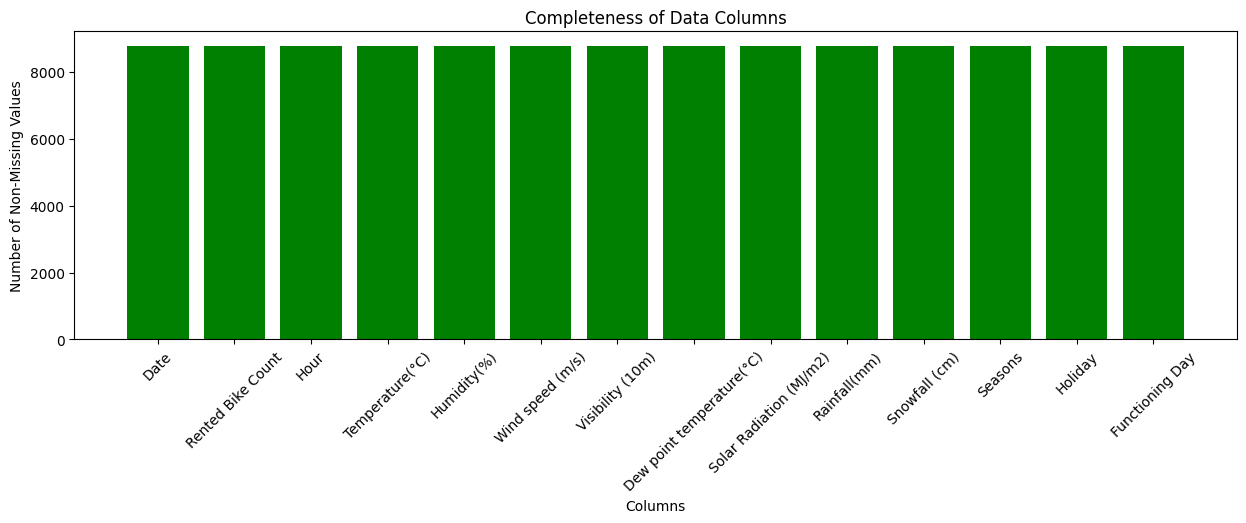

In [11]:
# Visualizing the missing values
plt.figure(figsize=(15, 4))
plt.bar(Data.columns, Data.notnull().sum(), color='green')
plt.title('Completeness of Data Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Non-Missing Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### What did you know about your dataset?

### We are happy to know that there is no missing value and duplicate value present in my dataset.This is a good dataset for modeling.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
Columns = Data.columns
Columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# Dataset Describe
Data.describe(include = 'all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

# **Variables Description**

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# Feature Information :
      Date : year-month-day

      Rented_Bike_Count - Count of bikes rented at each hour

      Hour - Hour of he day

      Temperature-Temperature in Celsius

      Humidity - %

      Windspeed - m/s

      Visibility - 10m

      Dew point temperature - Celsius

      Solar radiation - MJ/m2

      Rainfall - mm

      Snowfall - cm

      Seasons - Winter, Spring, Summer, Autumn

      Holiday - Holiday/No holiday
      
      Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
numerical_feature = Data.describe().columns
unique_value = {}

for col in Columns:
  unique = Data[col].nunique()
  unique_value[col] = unique

print(f'Number of unique value for each variable {unique_value}')

Number of unique value for each variable {'Date': 365, 'Rented Bike Count': 2166, 'Hour': 24, 'Temperature(°C)': 546, 'Humidity(%)': 90, 'Wind speed (m/s)': 65, 'Visibility (10m)': 1789, 'Dew point temperature(°C)': 556, 'Solar Radiation (MJ/m2)': 345, 'Rainfall(mm)': 61, 'Snowfall (cm)': 51, 'Seasons': 4, 'Holiday': 2, 'Functioning Day': 2}


In [15]:
# Let see the unique value of caltegorical features
categorical_feature = Data.describe(include = ['object','category']).columns
C_un_values = {}
for col in categorical_feature[1:]:
  unique = Data[col].unique()
  C_un_values[col] = unique

print(f'Unique values in each categorical_feature are {C_un_values}')

Unique values in each categorical_feature are {'Seasons': array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object), 'Holiday': array(['No Holiday', 'Holiday'], dtype=object), 'Functioning Day': array(['Yes', 'No'], dtype=object)}


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
#converting few features names for Rediability
Data.rename({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [17]:
Data.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [18]:
# check datatype
print(Data['Date'].dtype)

#creating copy to keep oringal data safe
df = Data.copy()

# Change date data type to datetime obj
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

object


In [19]:
#Extracting month from date column
df['Month'] = df['Date'].dt.strftime('%b')
#Extracting day name from date
df['Day'] = df['Date'].dt.strftime('%a')

#Extracting year
df['Year'] = df['Date'].dt.year

df.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day Month  Day  Year  
0  Winter  No Holiday             Yes   Jan  Thu  2017  
1  Winter  No Holiday             Yes   Jan  Thu  2017  
2  Winter  No Holiday             Yes   Jan  Thu  2017  
3  Winter  No Holiday             Yes   Jan  Thu  2017  
4  Winter  No Holiday             Yes   Jan  Thu  2017

### What all manipulations have you done and insights you found?

*   # We may not need to perform so much data cleaning because the ranges of values in the numerical columns appear fair as well. However,columns like Wind speed , Dew_point_temperature, Solar Radiation, Rainfall and Snowfall appears to be skewed as their median (50 percentile) is much lower than the max value.
*  # And we extracting Day,month,year column from Date column for our visulization  purpose.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
# Chart - 1 visualization code
#visualize effect on bike_count for change in temparature,humidity,windspeed,visibilty,Dew_point_temp,solar_rad,snow_fall,Rain_fall
numerical_feature = Data.describe().columns
numerical_feature

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

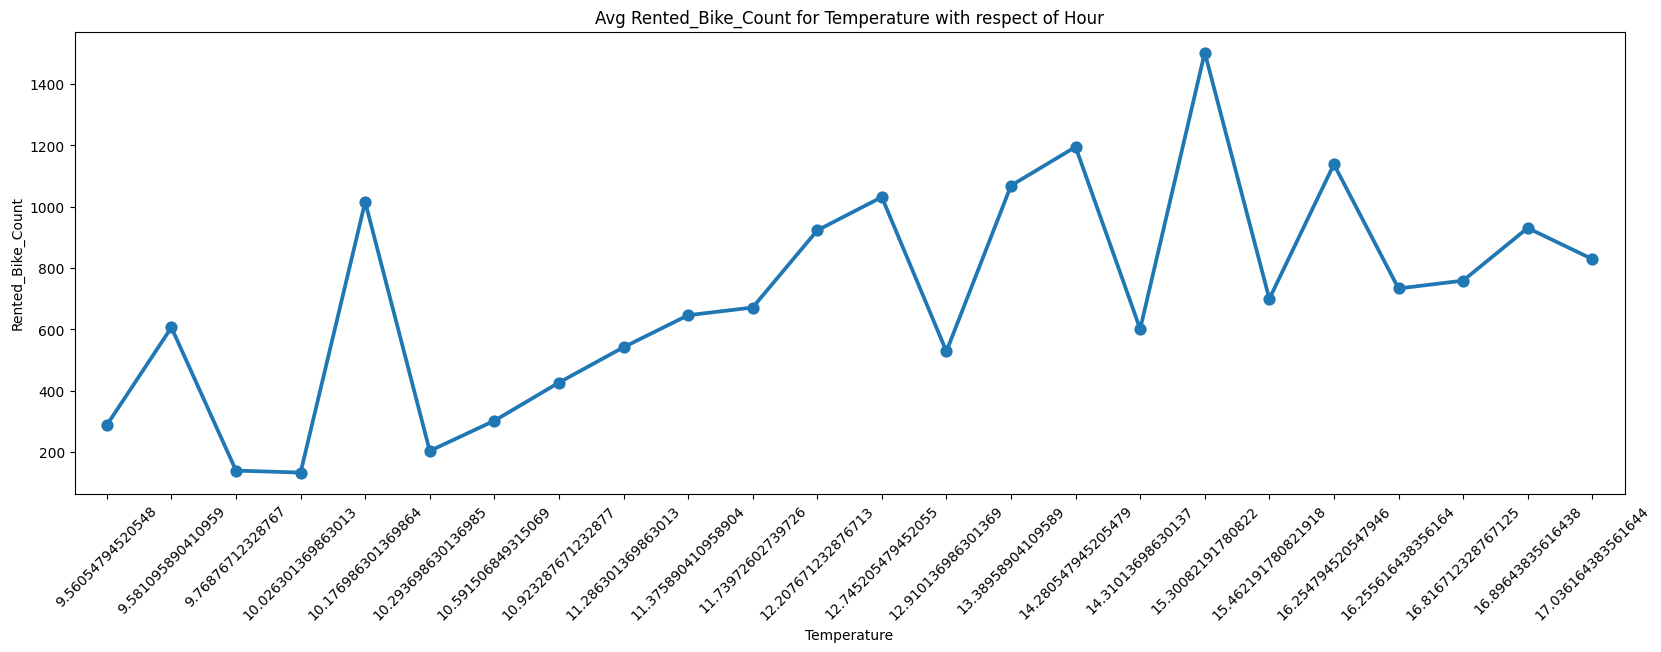

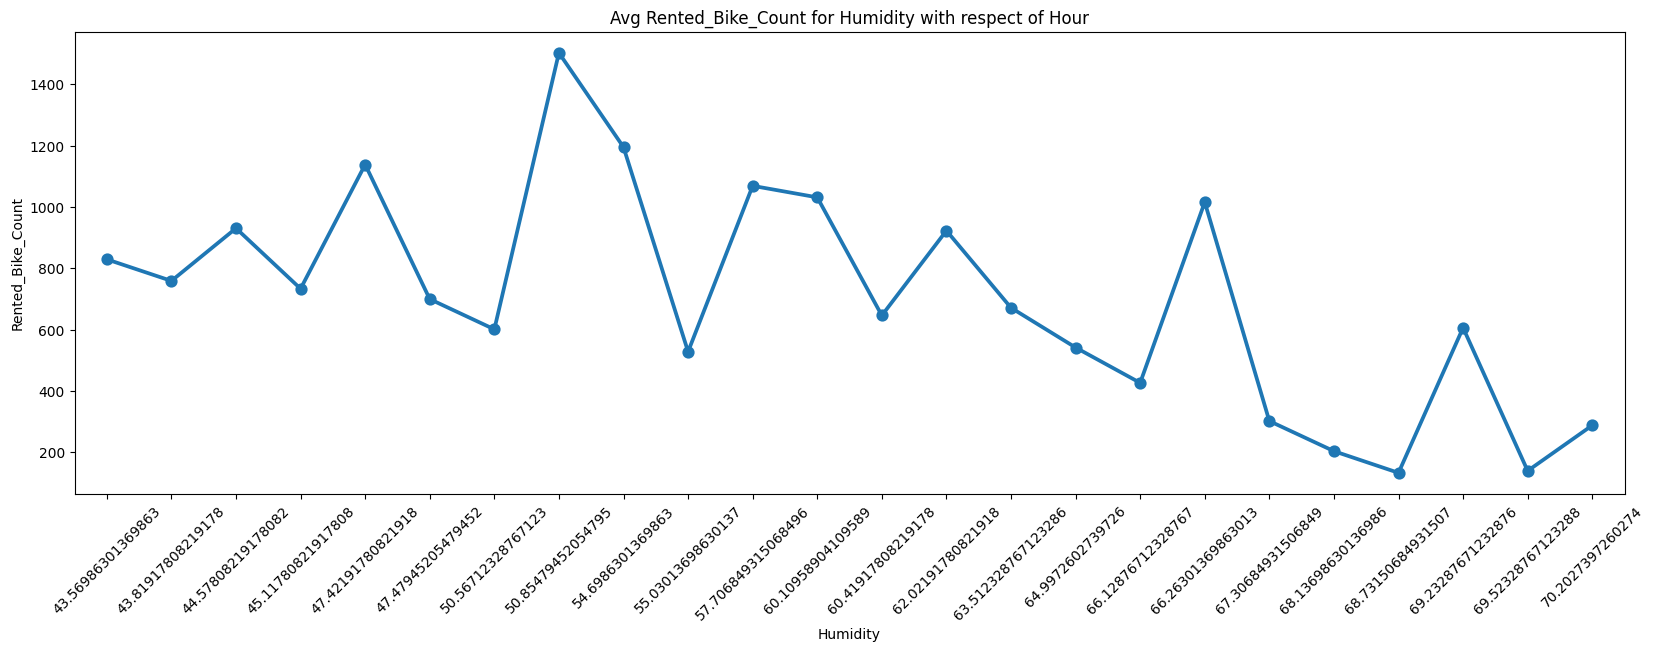

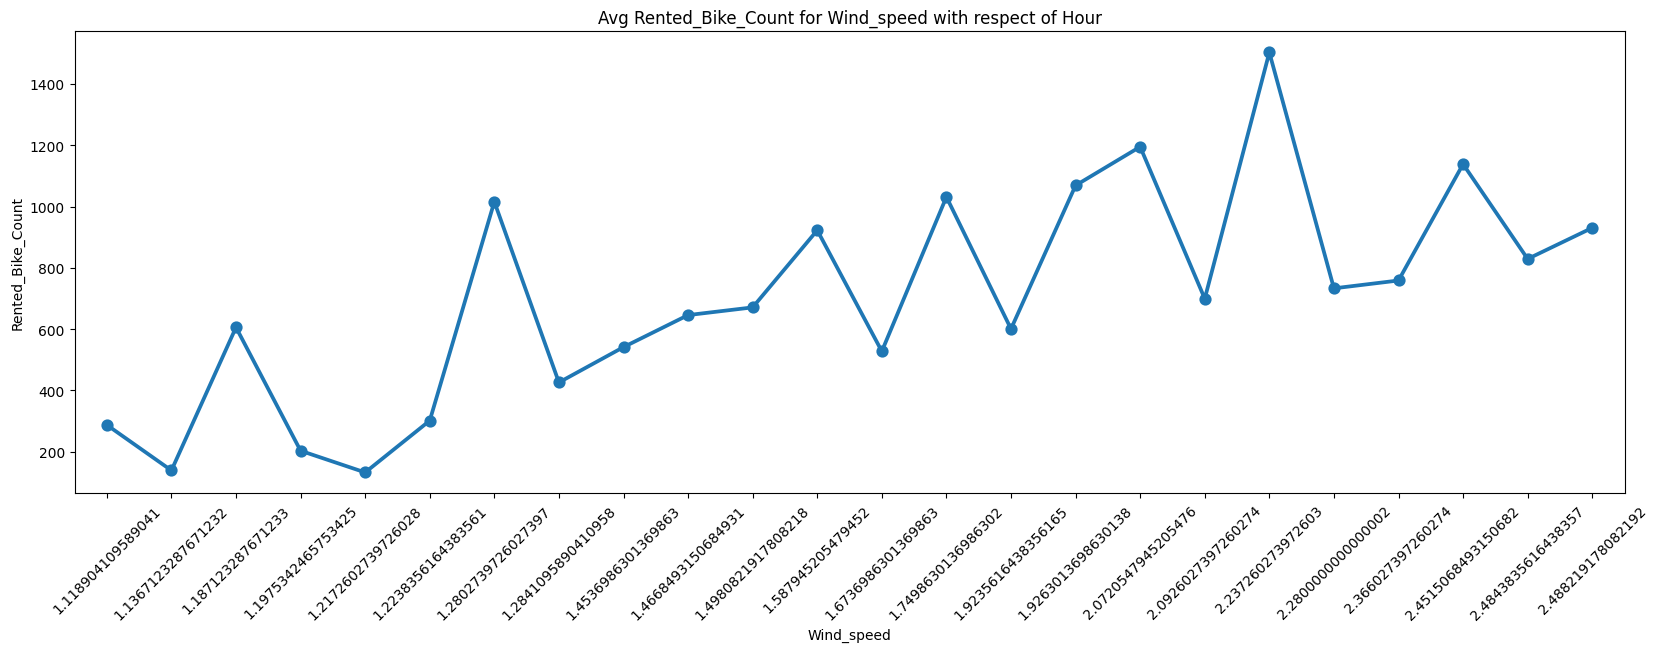

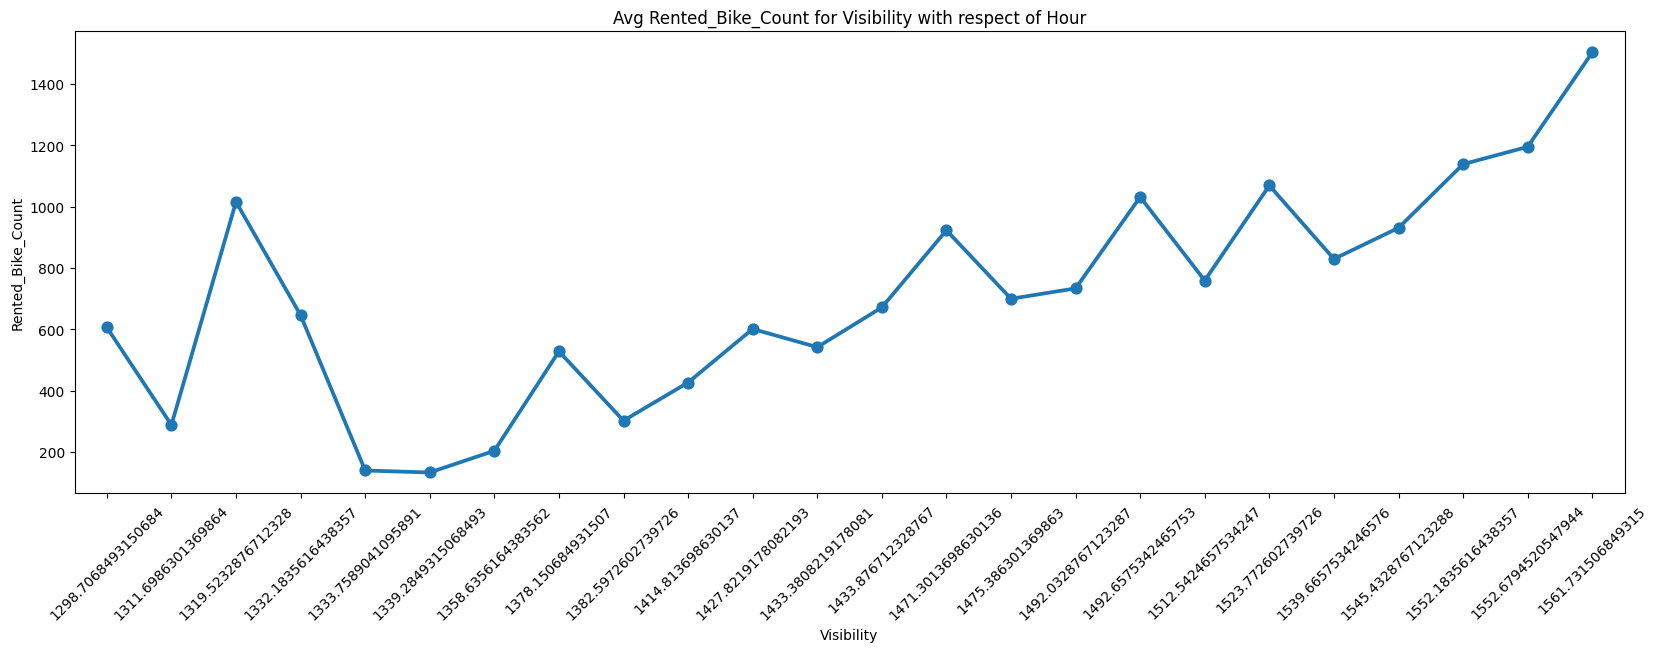

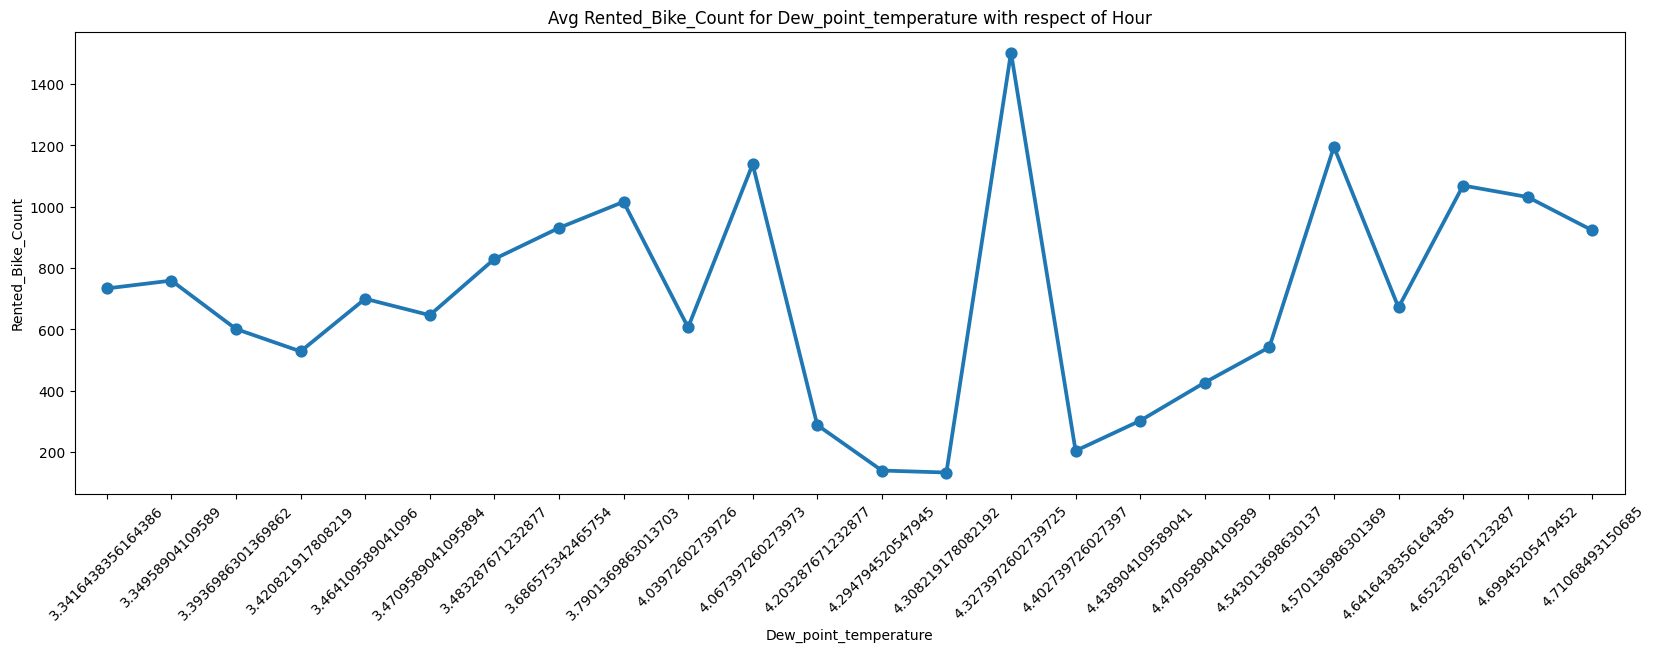

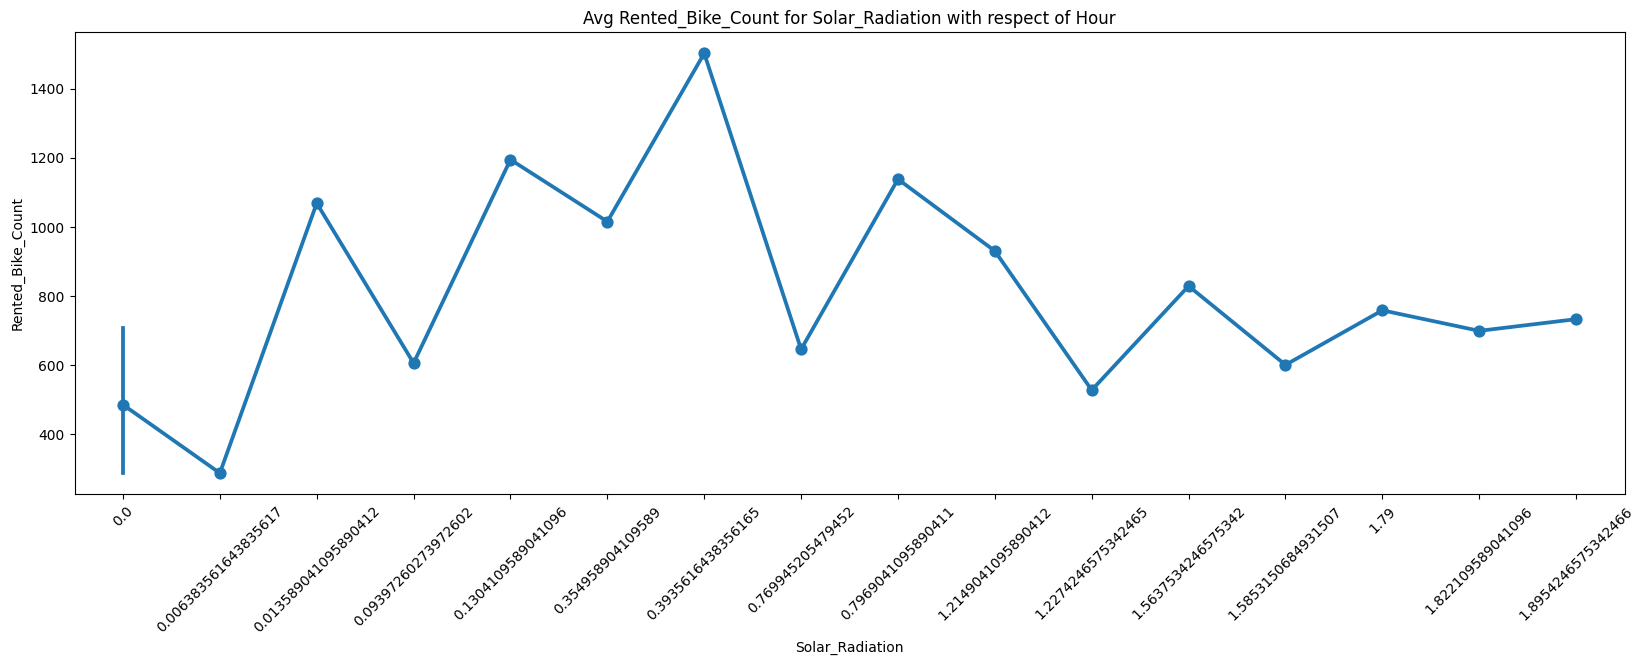

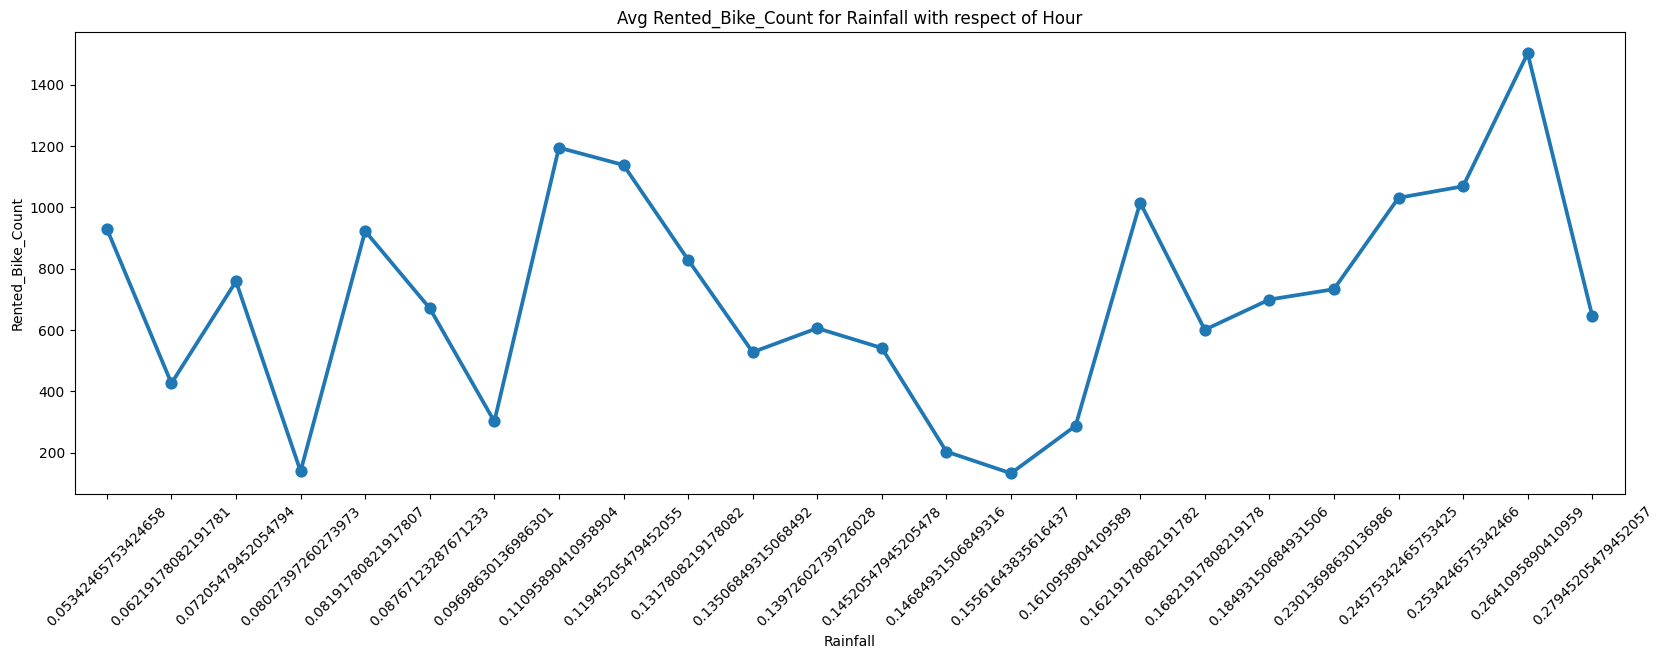

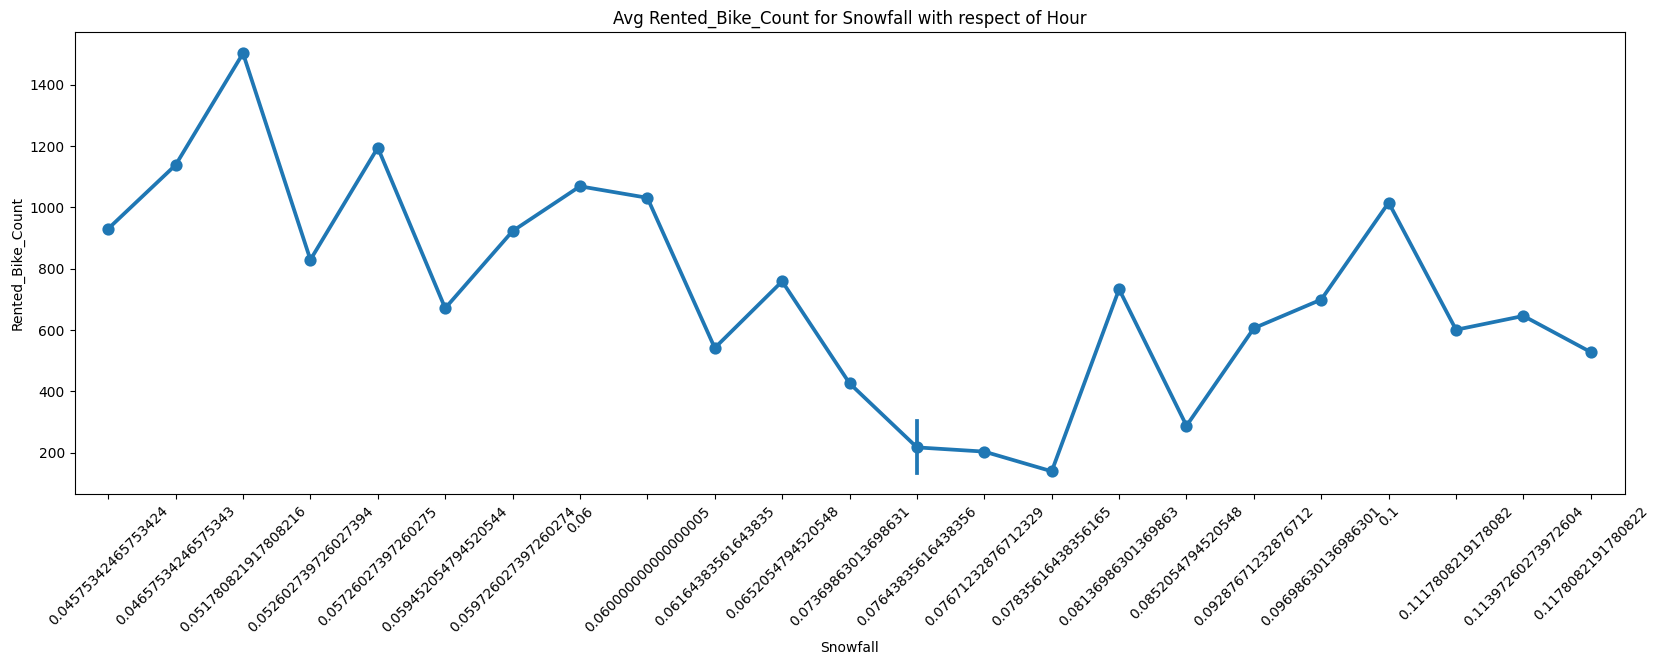

In [21]:
for col in numerical_feature[2:]:
    grp = df.groupby(['Hour'], as_index = False)[col,'Rented_Bike_Count'].mean().sort_values(col, ascending = False)
    plt.figure(figsize=(20,6))
    sns.pointplot(x=grp.loc[:,col], y=grp["Rented_Bike_Count"])
    plt.title(f"Avg Rented_Bike_Count for {col} with respect of Hour")
    plt.xticks(rotation=45)
    plt.show()

##### 1. Why did you pick the specific chart?

From this chart we can easily understand the change in bike demand for change in different different features

##### 2. What is/are the insight(s) found from the chart?



*   When temparature,humidity,wind speed,dew point temparature are modereate (means fair to go outside),more people using bike for travel.
*  when the visibilty was high bike demand also high.
*  When solar radiation,rain fall and snow fall were less bike demand is high.






#### Chart - 2

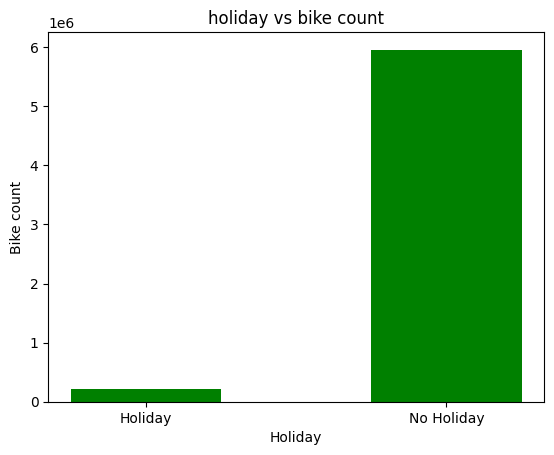

In [22]:
# Chart - 2 visualization code
# visulize the rented bike count for working day vs non working day
grp = df.groupby(['Holiday'], as_index = False)['Rented_Bike_Count'].sum()

plt.bar(grp.iloc[:,0],grp.iloc[:,1], color ='green',
        width = 0.5)
plt.xlabel("Holiday")
plt.ylabel("Bike count")
plt.title("holiday vs bike count")
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart usually use to check how a particular variable varies across different type of another variable thats why i choose this bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can  see that in working day bike demand is so high as compare to non working day.

#### Chart - 3

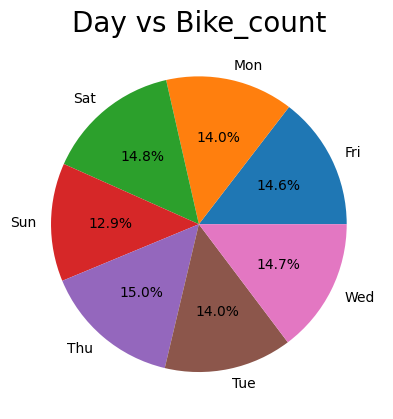

In [23]:
# Chart - 3 visualization code
# visualize the rented bike count for each day
Day = df.groupby('Day')['Rented_Bike_Count'].sum()
plt.pie(Day, labels=Day.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title("Day vs Bike_count", fontsize='20')
plt.show()


##### 2. What is/are the insight(s) found from the chart?

From the above visualization we found that All the days in week except sunday,people are more use bikes

#### Chart - 4

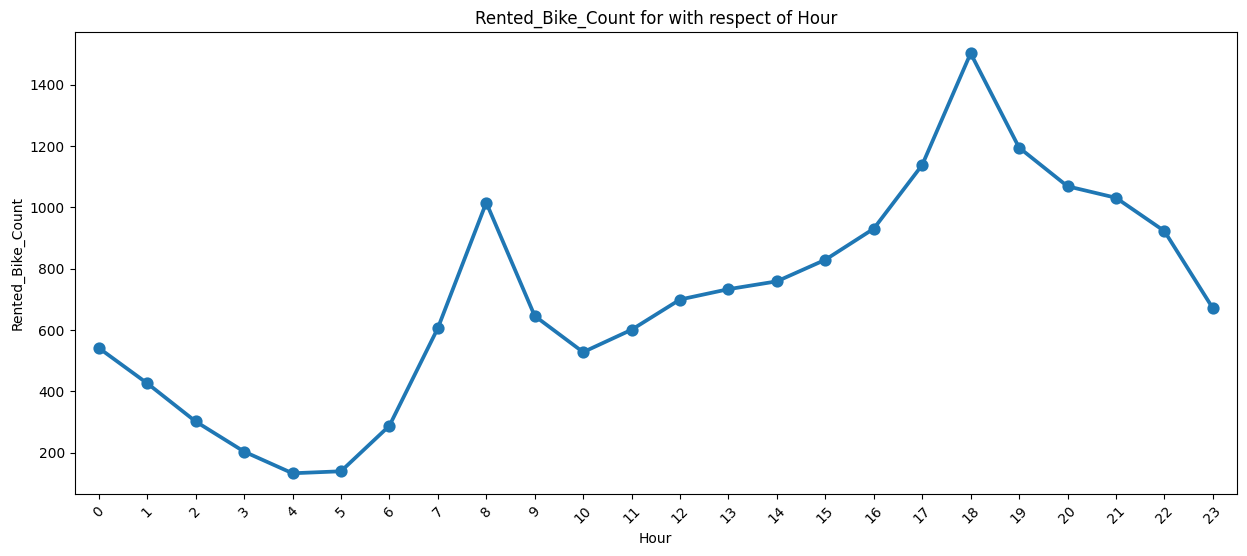

In [24]:
# Chart - 4 visualization code
#visualize  avg rented bike count for every hour in a day
grp = df.groupby(['Hour'], as_index = False)['Rented_Bike_Count'].mean().sort_values('Hour', ascending = True)
plt.figure(figsize=(15,6))
sns.pointplot(x=grp['Hour'], y=grp["Rented_Bike_Count"])
plt.title("Rented_Bike_Count for with respect of Hour")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Point plots can be more useful for focusing comparisons between different levels of one or more categorical variables

##### 2. What is/are the insight(s) found from the chart?



*   Demand for rented bike count is higher at 7 AM to 9 AM and 6PM to 8PM indicating a high demand during business hours.

#### Chart - 5

In [25]:
# Chart - 5 visualization code
#Visualize bike demand for holiday and non holiday
grp = df.groupby(['Hour','Holiday'], as_index = False)['Rented_Bike_Count'].mean().sort_values('Hour', ascending = True)
grp

Hour     Holiday  Rented_Bike_Count
0      0     Holiday         466.166667
1      0  No Holiday         545.365994
2      1     Holiday         393.333333
3      1  No Holiday         427.887608
4      2     Holiday         303.888889
5      2  No Holiday         301.512968
6      3     Holiday         212.333333
7      3  No Holiday         202.864553
8      4     Holiday         128.388889
9      4  No Holiday         132.809798
11     5  No Holiday         141.680115
10     5     Holiday          89.000000
12     6     Holiday         132.833333
13     6  No Holiday         295.590778
14     7     Holiday         214.277778
15     7  No Holiday         626.325648
16     8     Holiday         348.500000
17     8  No Holiday        1050.311239
18     9     Holiday         379.222222
19     9  No Holiday         659.821326
20    10     Holiday         428.555556
21    10  No Holiday         532.971182
23    11  No Holiday         605.564841
22    11     Holiday         510.000000
24    12     Holiday         621.611111
25    12  No Holiday         703.478386
26    13     Holiday         702.666667
27    13  No Holiday         734.832853
28    14     Holiday         734.000000
29    14  No Holiday         760.112392
30    15     Holiday         747.777778
31    15  No Holiday         833.409222
32    16     Holiday         787.611111
33    16  No Holiday         938.040346
35    17  No Holiday        1154.487032
34    17     Holiday         830.500000
36    18     Holiday         800.666667
37    18  No Holiday        1539.354467
38    19     Holiday         721.944444
39    19  No Holiday        1219.694524
40    20     Holiday         713.777778
41    20  No Holiday        1087.389049
42    21     Holiday         678.333333
43    21  No Holiday        1049.766571
44    22     Holiday         596.833333
45    22  No Holiday         939.706052
46    23     Holiday         451.944444
47    23  No Holiday         682.495677

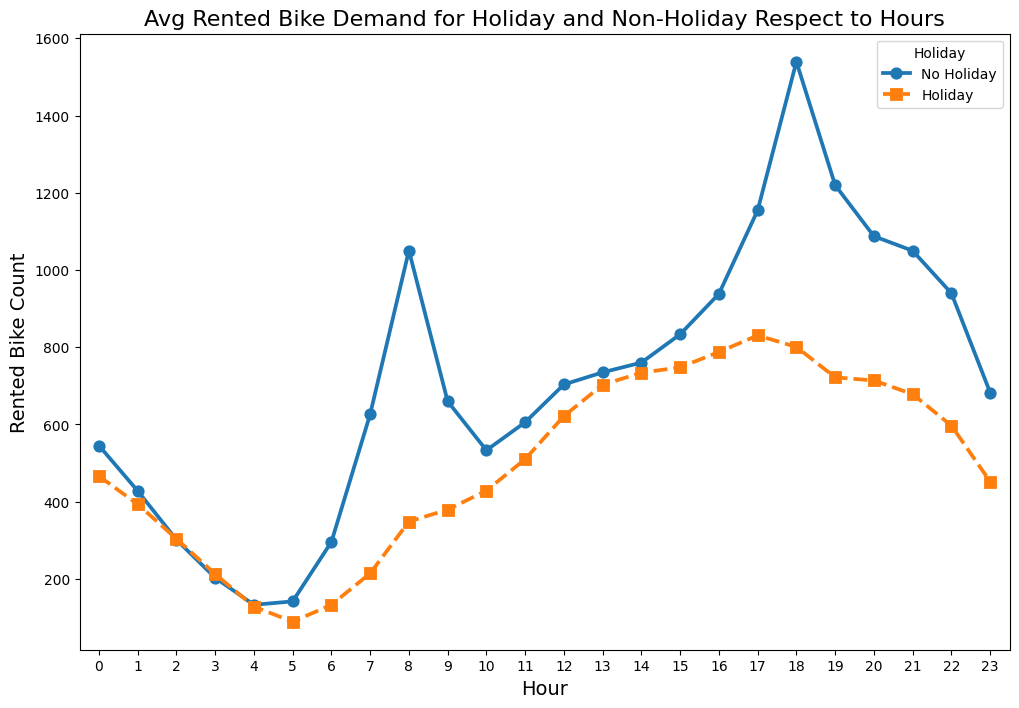

In [26]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='Hour', y='Rented_Bike_Count', hue='Holiday', data=df, ci=None, markers=['o', 's'], linestyles=['-', '--'])

# Add labels and title
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.title('Avg Rented Bike Demand for Holiday and Non-Holiday Respect to Hours', fontsize=16)

# Add legend
plt.legend(title='Holiday', loc='upper right')

# Show the plot
plt.show()


##### 2. What is/are the insight(s) found from the chart?

Answer Here

*   Rented Bike Count follows 2 patterns one for holiday and another for no holiday.
*   No Holiday : The first pattern is where there is a peak in the rentals at around 8 am and another at around 6 pm. These correspond to local bikers who typically go to work on a working day, Monday to Friday.

*   Holiday : Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probable tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday





#### Chart - 6

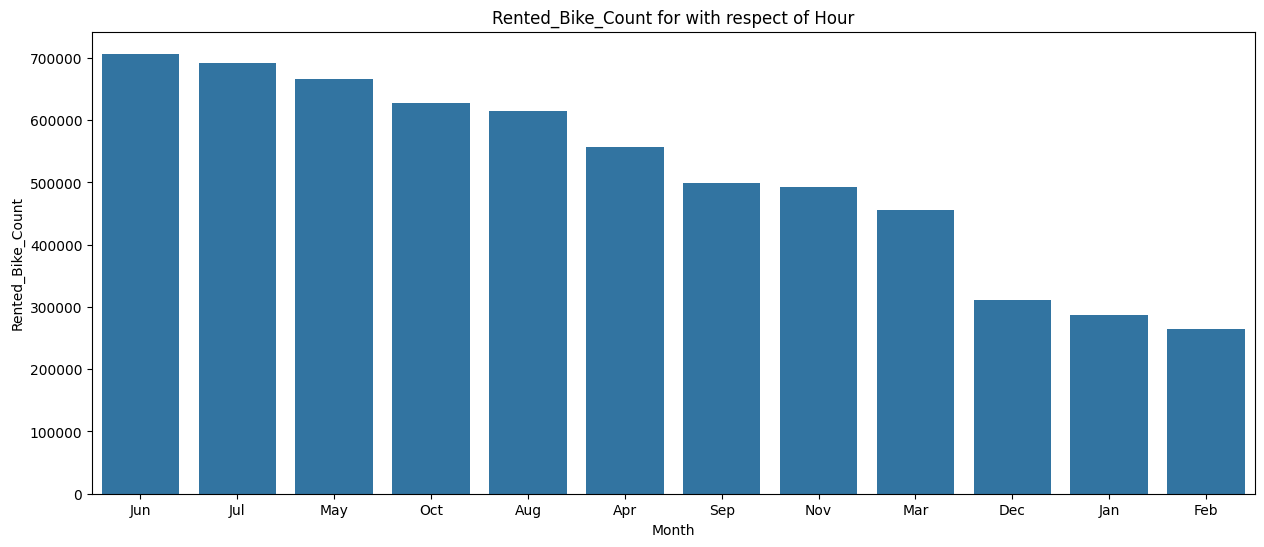

In [27]:
# Chart - 6 visualization code
# Rented bike count for each month
grp = df.groupby(['Month'], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False)
plt.figure(figsize=(15,6))
sns.barplot(x=grp['Month'], y=grp["Rented_Bike_Count"])
plt.title("Rented_Bike_Count for with respect of Hour")
plt.show()


##### 2. What is/are the insight(s) found from the chart?

From the above observation we can see the bike demand is low in jan,feb and december.but from the month of march to nov the bike demand is increase gradualy as compare to dec,jan and feb.

#### Chart - 7

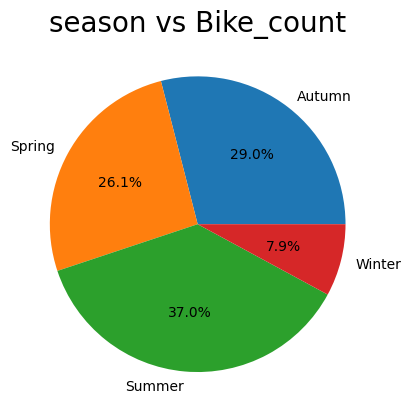

In [28]:
# Chart - 7 visualization code
# visualize the effect of season in bike demand
season = df.groupby('Seasons')['Rented_Bike_Count'].sum()
plt.pie(season, labels=season.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title("season vs Bike_count", fontsize='20')
plt.show()

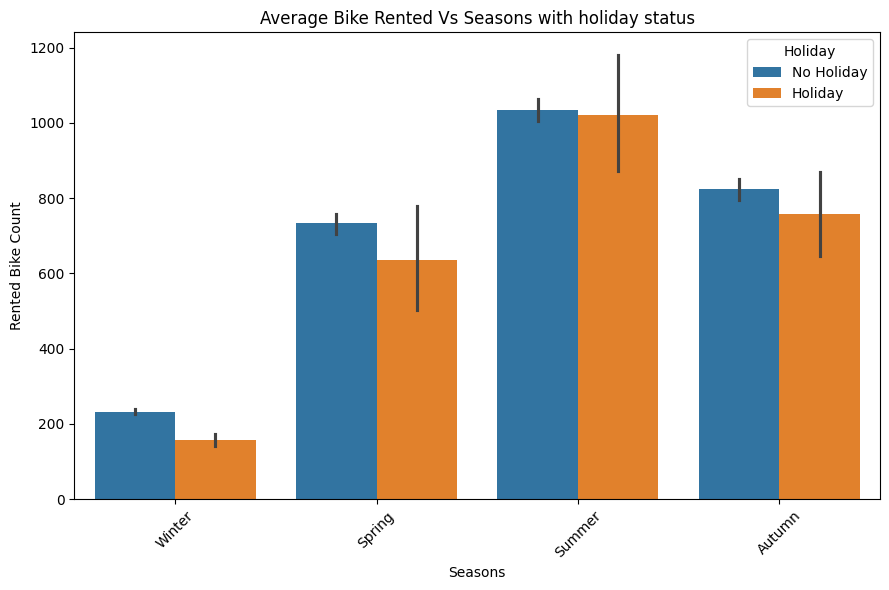

In [29]:
fig, ax = plt.subplots(figsize=(9, 6))

# Use barplot with 'hue' to differentiate 'Holiday' and 'No Holiday'
cat = sns.barplot(data=df, x='Seasons', y='Rented_Bike_Count', hue='Holiday', ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
cat.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

# Add legend
ax.legend(title='Holiday', loc='upper right')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?



*   The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.
*   In every season  non holiday rented_bike_count has more count than on a holiday.



#### Chart - 8

In [30]:
# Chart - 8 visualization code
# visualize Bike demand in functioning and non functioning day
grp = df.groupby(['Functioning_Day','Hour'], as_index = False)['Rented_Bike_Count'].sum().sort_values(['Functioning_Day','Hour'], ascending = False)
grp

Functioning_Day  Hour  Rented_Bike_Count
47             Yes    23             244961
46             Yes    22             336821
45             Yes    21             376479
44             Yes    20             390172
43             Yes    19             436229
42             Yes    18             548568
41             Yes    17             415556
40             Yes    16             339677
39             Yes    15             302653
38             Yes    14             276971
37             Yes    13             267635
36             Yes    12             255296
35             Yes    11             219311
34             Yes    10             192655
33             Yes     9             235784
32             Yes     8             370731
31             Yes     7             221192
30             Yes     6             104961
29             Yes     5              50765
28             Yes     4              48396
27             Yes     3              74216
26             Yes     2             110095
25             Yes     1             155557
24             Yes     0             197633
23              No    23                  0
22              No    22                  0
21              No    21                  0
20              No    20                  0
19              No    19                  0
18              No    18                  0
17              No    17                  0
16              No    16                  0
15              No    15                  0
14              No    14                  0
13              No    13                  0
12              No    12                  0
11              No    11                  0
10              No    10                  0
9               No     9                  0
8               No     8                  0
7               No     7                  0
6               No     6                  0
5               No     5                  0
4               No     4                  0
3               No     3                  0
2               No     2                  0
1               No     1                  0
0               No     0                  0

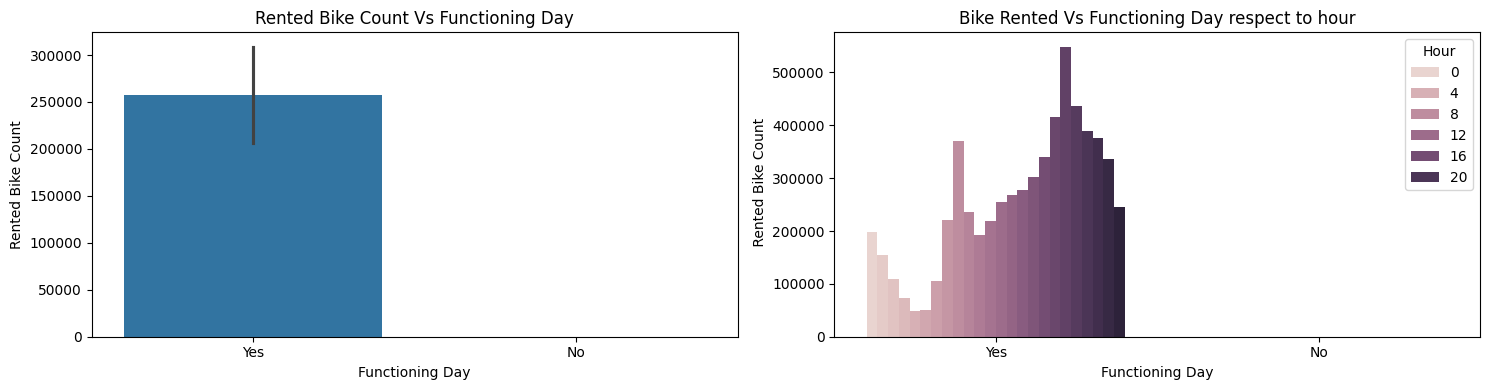

In [31]:
fig,ax = plt.subplots(1,2, figsize=(15,4))

# Rented Bike Count Vs Functioning Day
bar = sns.barplot(data=grp, x='Functioning_Day', y='Rented_Bike_Count', ax = ax[0])
bar.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Rented Bike Count Vs Functioning Day')

# Multi-variate analysis
cat = sns.barplot(data=grp, x='Functioning_Day', y='Rented_Bike_Count', hue='Hour', ax= ax[1])
cat.set(xlabel='Functioning Day', ylabel = ' Rented Bike Count', title= 'Bike Rented Vs Functioning Day respect to hour')

plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?



*   Even though we have some counts of no functioning days still there is no bike rented on a no functioning day.
*   On a functioning day, the evening(6 PM to 10 Pm) session has the most rented bike count.



#### Chart - 9

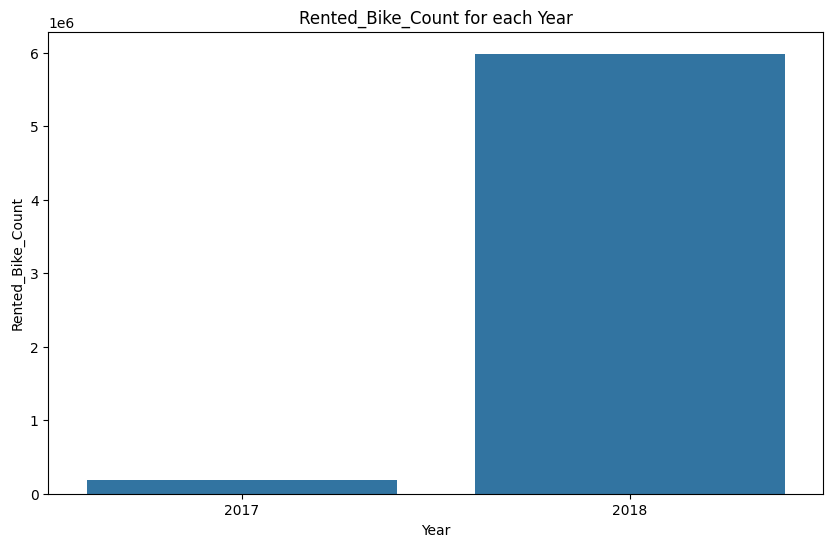

In [32]:
# Chart - 9 visualization code
#Compare ranted bike count for each year
grp = df.groupby(['Year'], as_index = False)['Rented_Bike_Count'].sum().sort_values('Year', ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x=grp['Year'], y=grp["Rented_Bike_Count"])
plt.title("Rented_Bike_Count for each Year")
plt.show()


##### 2. What is/are the insight(s) found from the chart?

The Dataset contains most of the data of 2018 and less amount of 2017 data.

#### Chart - 10

In [33]:
# Chart - 10 visualization code
numerical_features = df.describe().columns
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Year'],
      dtype='object')

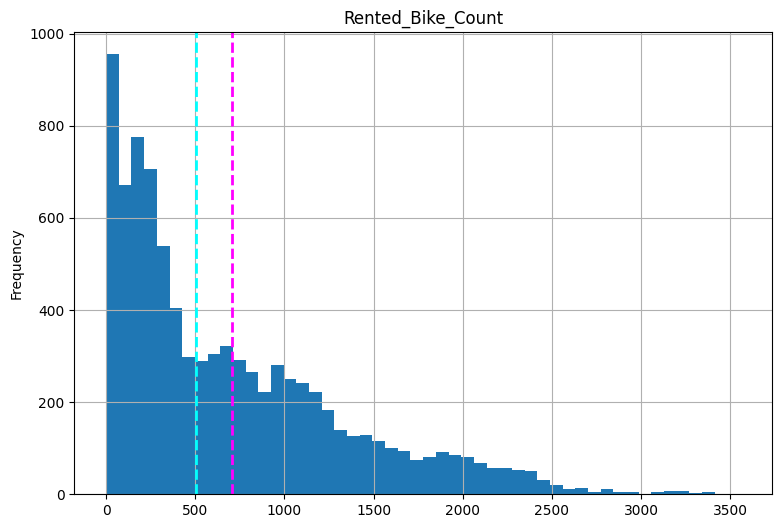

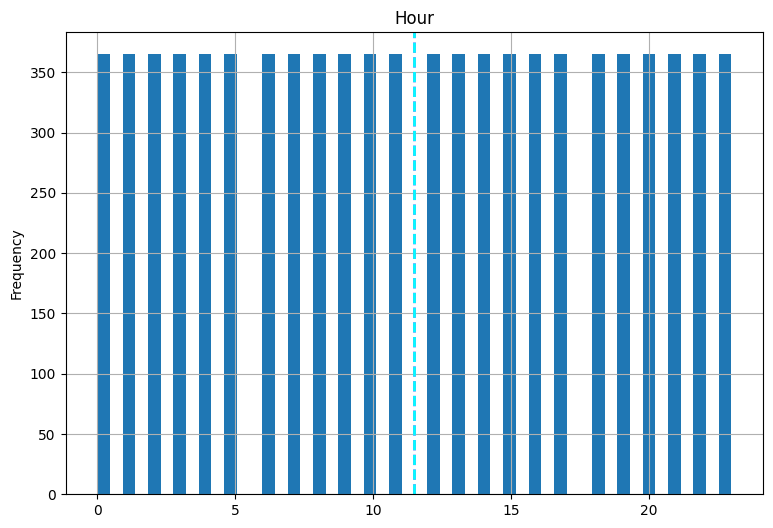

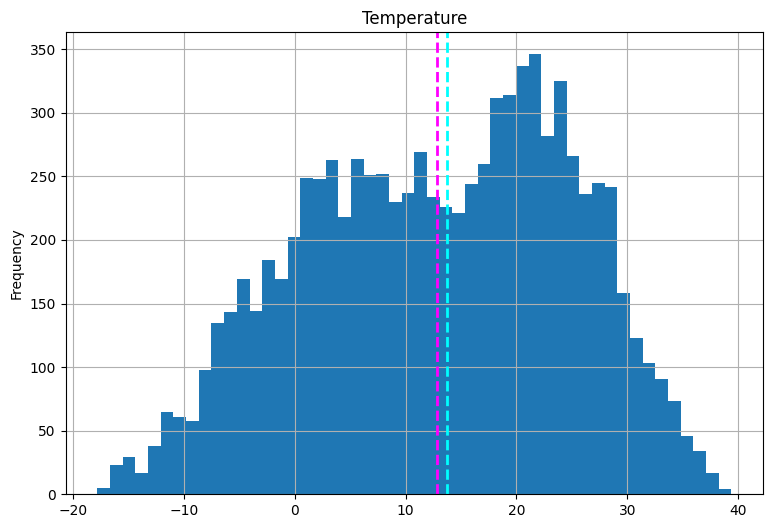

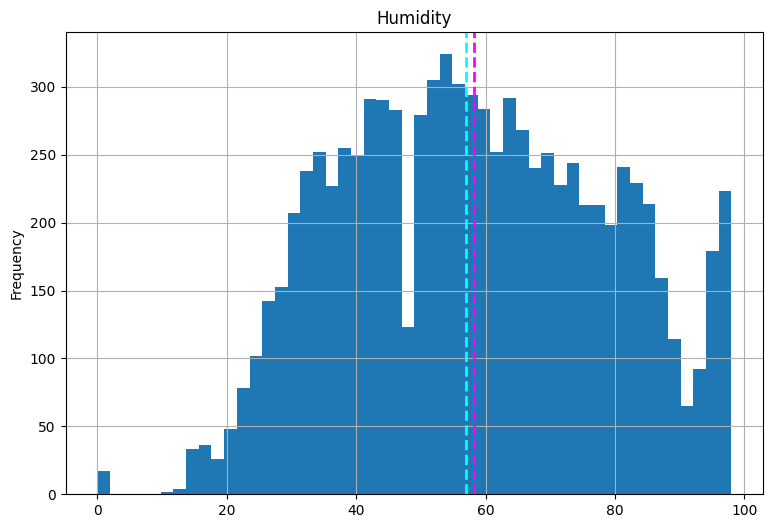

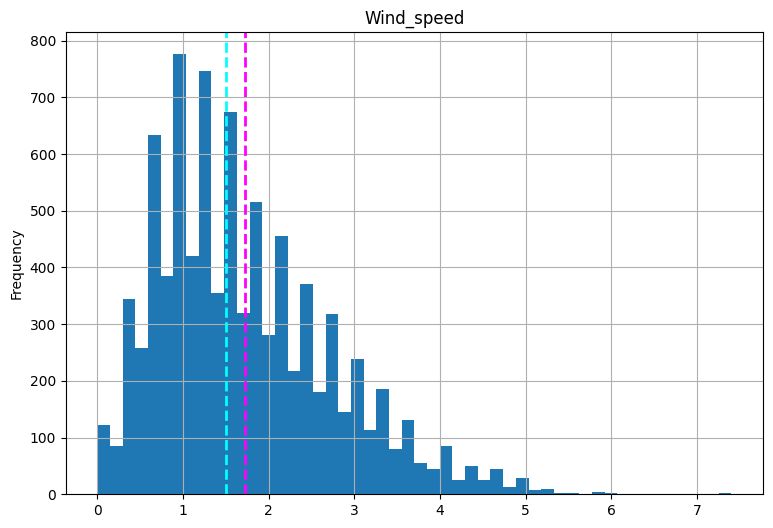

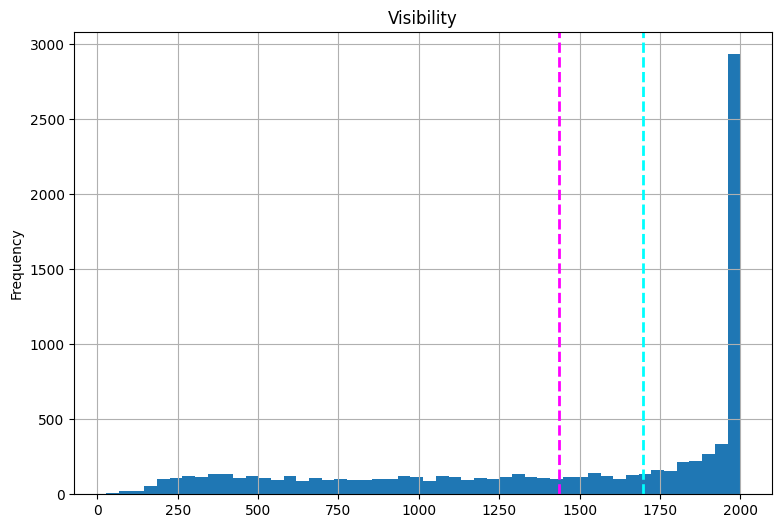

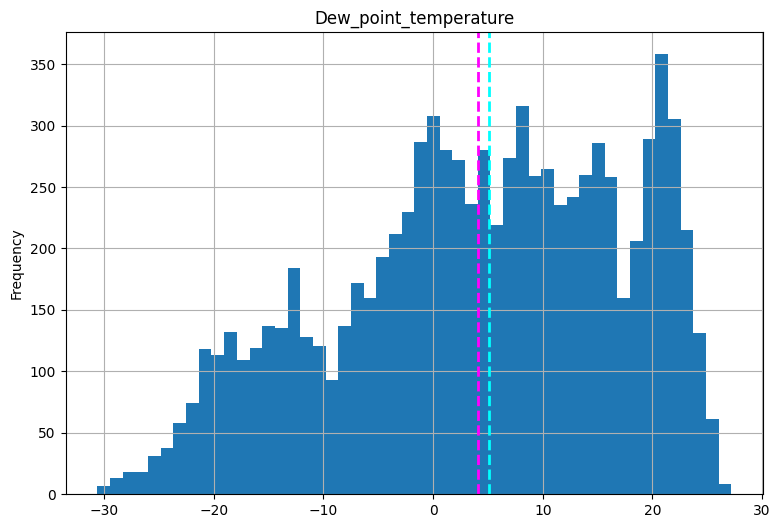

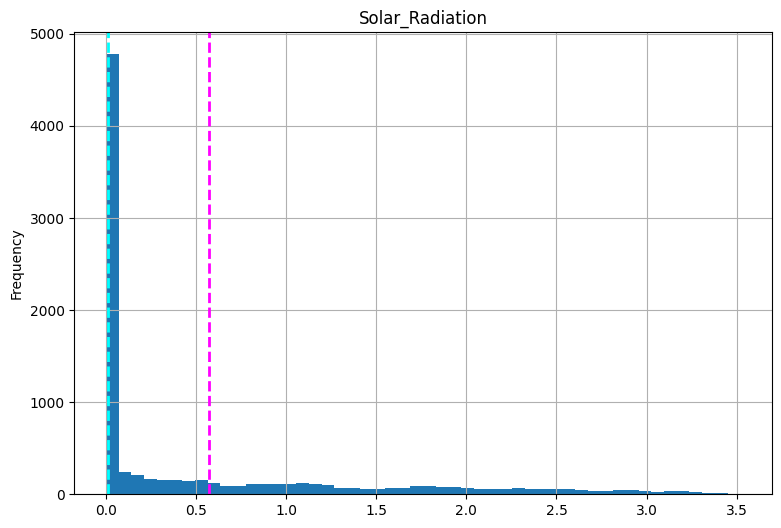

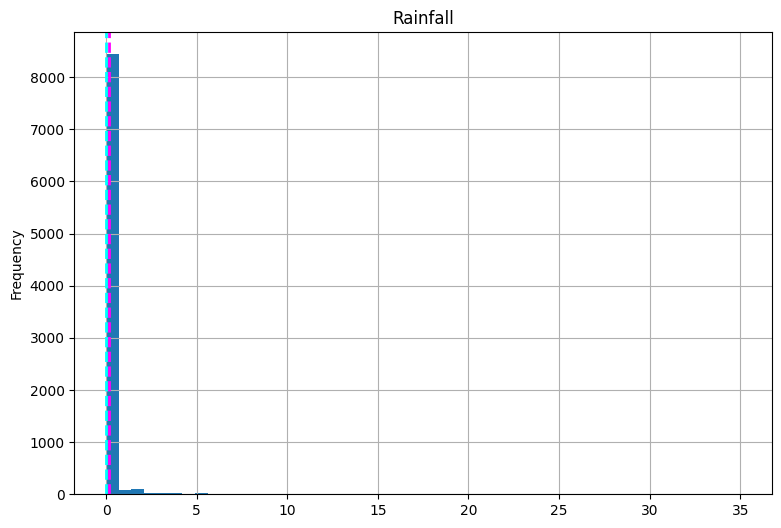

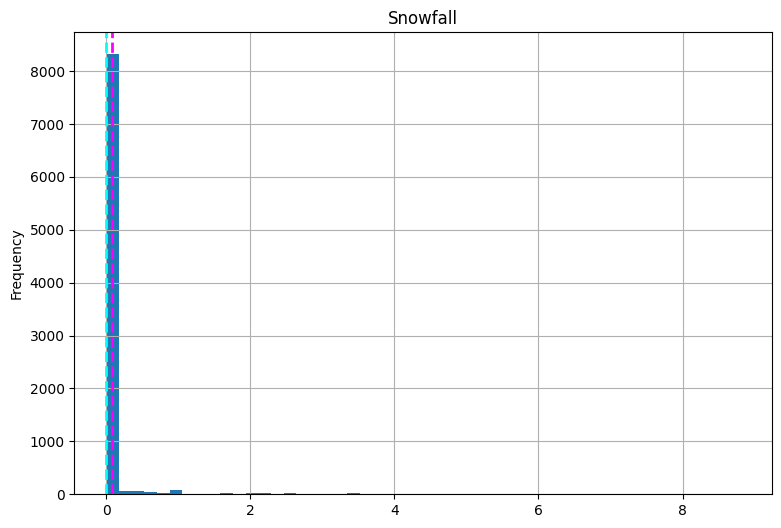

In [34]:
#plot a bar plot for each numerical feature except year
for col in numerical_features[:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50,ax = ax)
  ax.axvline(feature.mean(),color ='magenta',linestyle ='--',linewidth =2)
  ax.axvline(feature.median(),color ='cyan',linestyle ='--',linewidth =2)
  ax.set_title(col)
  ax.set_ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

 Because Histogram is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form

##### 2. What is/are the insight(s) found from the chart?

FRom the avove plot we see the distribution of datset.

*   Positive skew or right skew observed for rented bike count feature .so its need some log transformation over it
*   Some feature like temparature,humidity,dew point temparature,wind speed,rainfall and snowfall are normally distributed

*   Right skew and left skew observed for solar radiation and visibility feature respectively.so this feature also need log transformtion over it.






#### Chart - 11

In [35]:
# Chart - 11 visualization code
#create a pair plot(Rented_Bike_Count vs numerical feature) and fit a simple linear model over it.
Numerical_feature = df.describe().columns
Numerical_feature

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Year'],
      dtype='object')

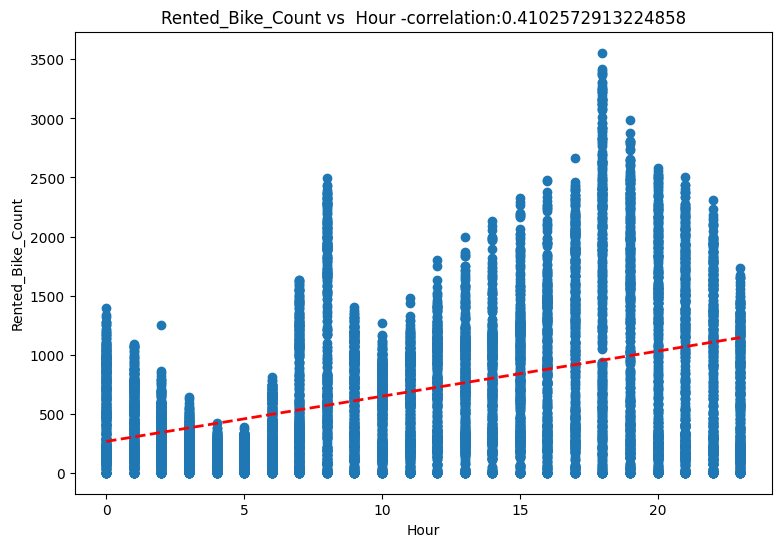

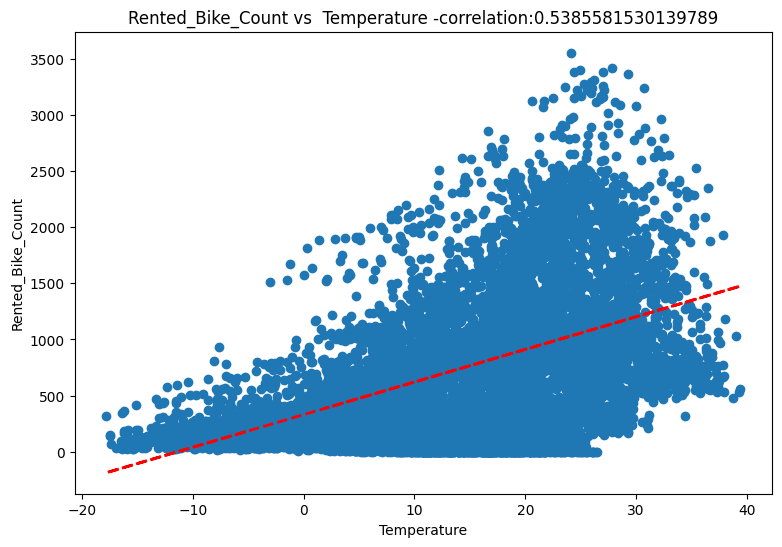

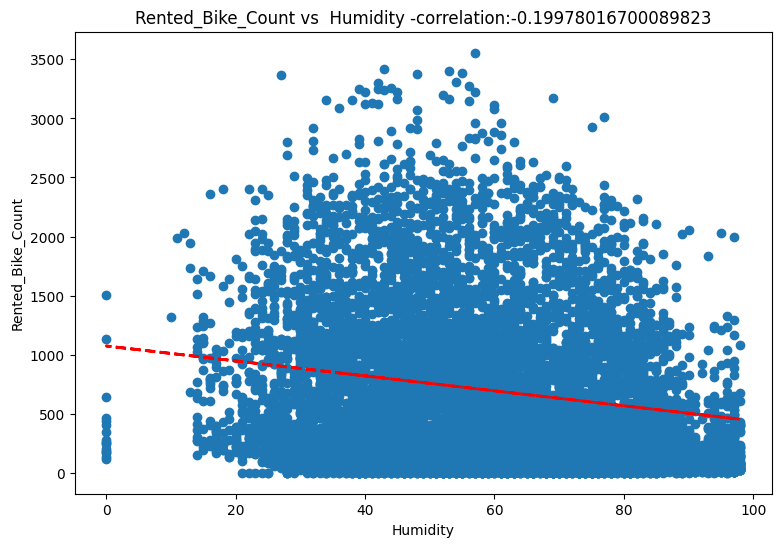

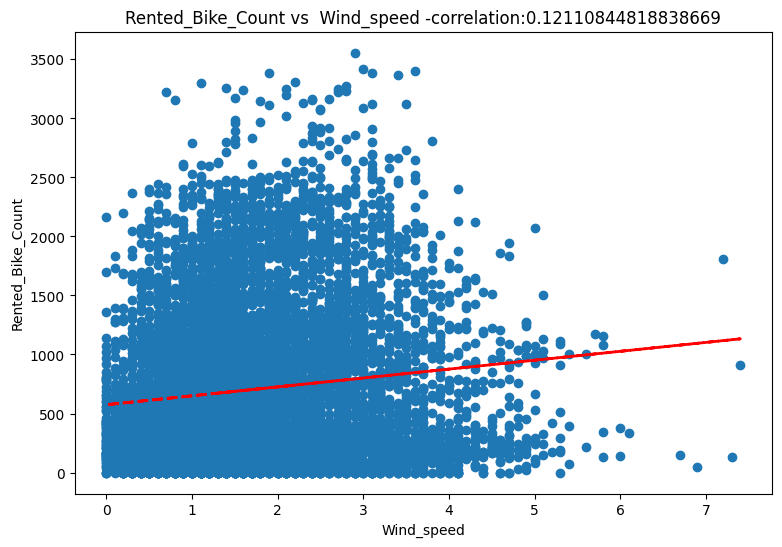

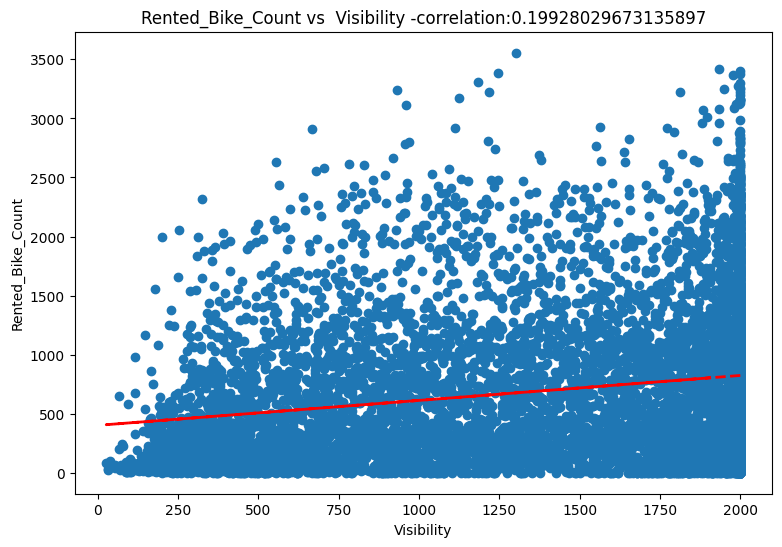

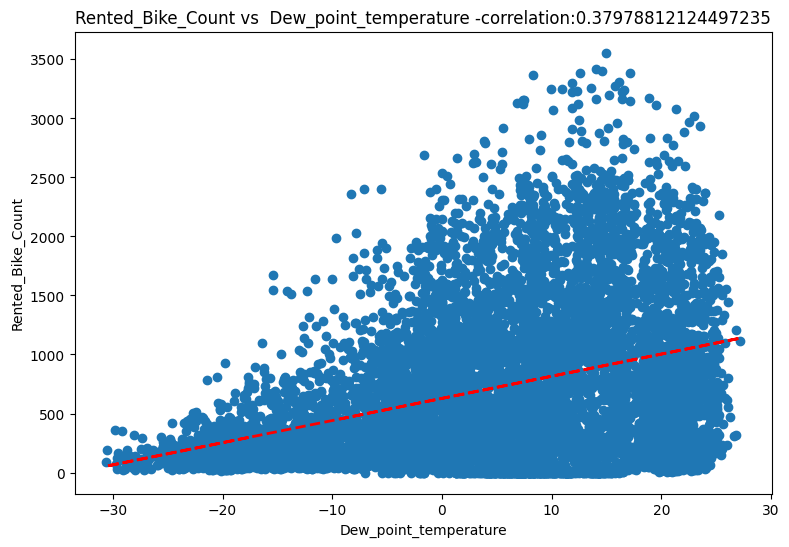

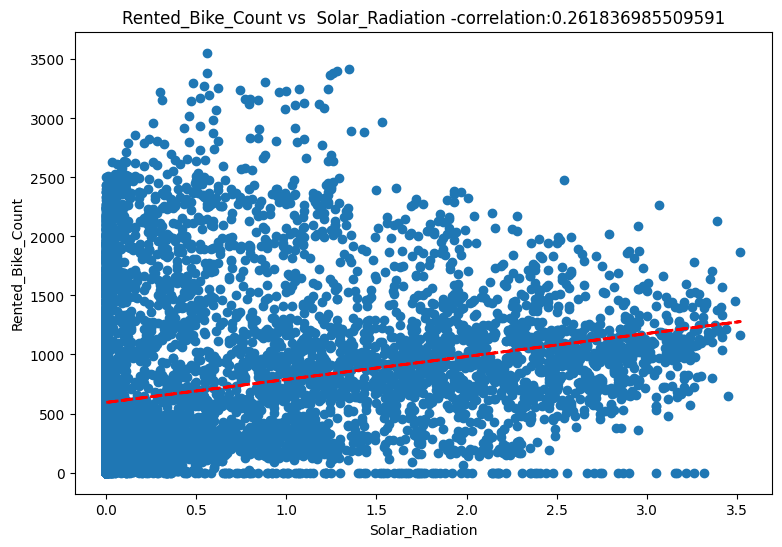

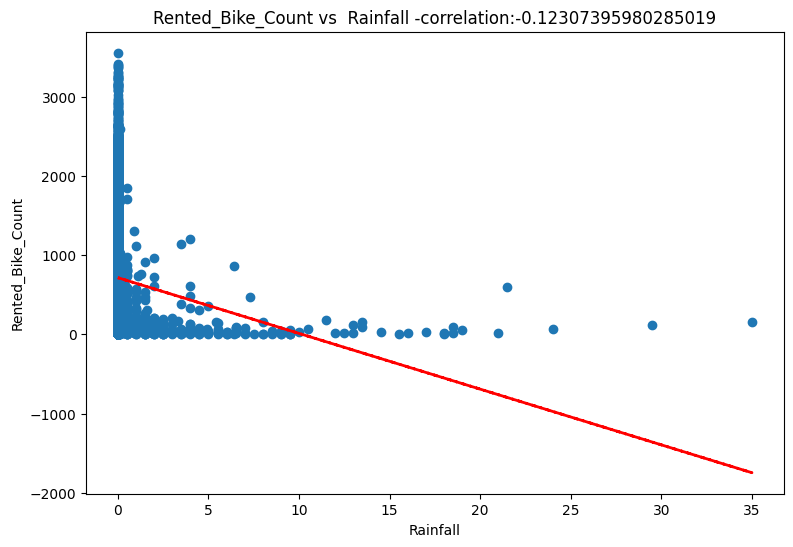

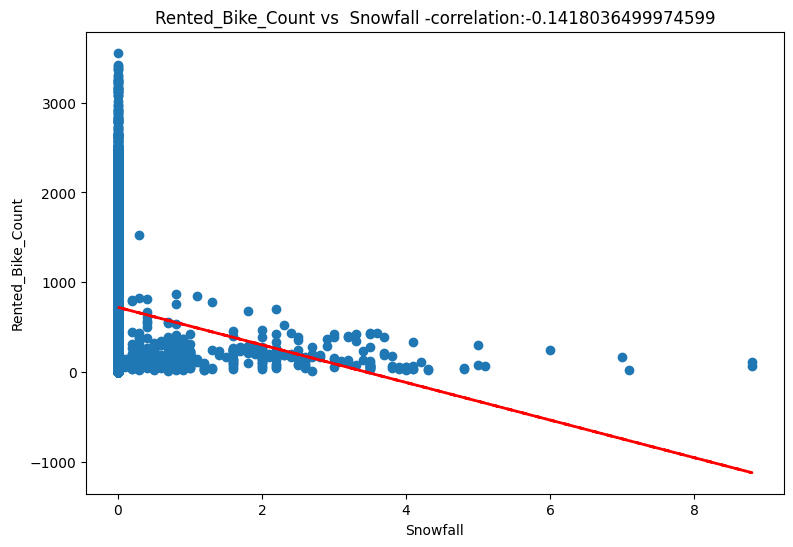

In [36]:
for col in Numerical_feature[1:-1]:
  fig = plt.figure(figsize= (9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented_Bike_Count']
  corr = feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Rented_Bike_Count')
  ax.set_title('Rented_Bike_Count vs  ' +col+' -correlation:'+str(corr))
  Z = np.polyfit(df[col],df['Rented_Bike_Count'],1)
  y_hat = np.poly1d(Z)(df[col])
  plt.plot(df[col],y_hat,"r--",lw=2)

plt.show()


##### 1. Why did you pick the specific chart?

Because using a scatter plot we can determine whether or not two variables have a relationship or correlation

##### 2. What is/are the insight(s) found from the chart?



*   Features like Hour(0.41),Temparature(0.53),wind speed(0.12),visibility(0.19),Dew point temp(0.37),solar radiation(0.26) are psitively correlated with rented bike count.
*   Humidity(-0.19),snowfall(-0.14), and rainfall(-0.12) negetively correlated with rented bike count.



#### Chart - 12

In [37]:
# Chart - 12 visualization code
# plot the boxplot for each categorical features by rented bike count
Categorical_feature = df.describe(include=['object','category']).columns
Categorical_feature

Index(['Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day'], dtype='object')

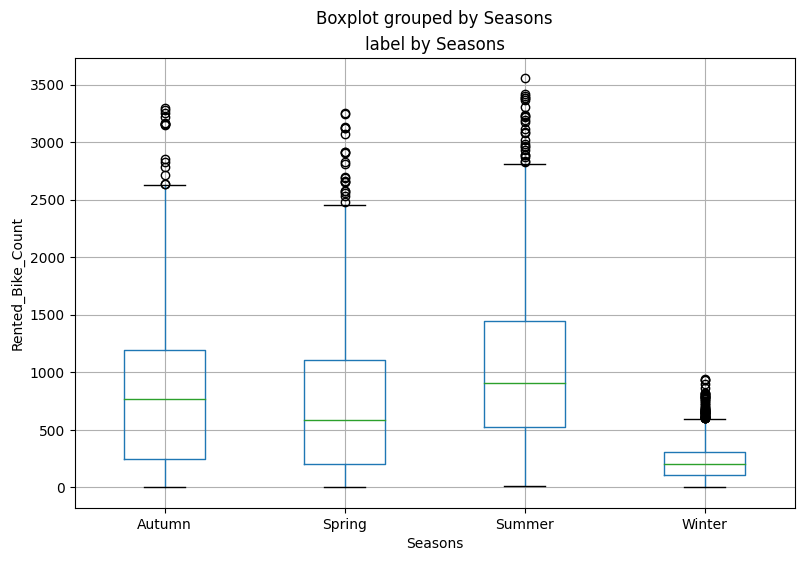

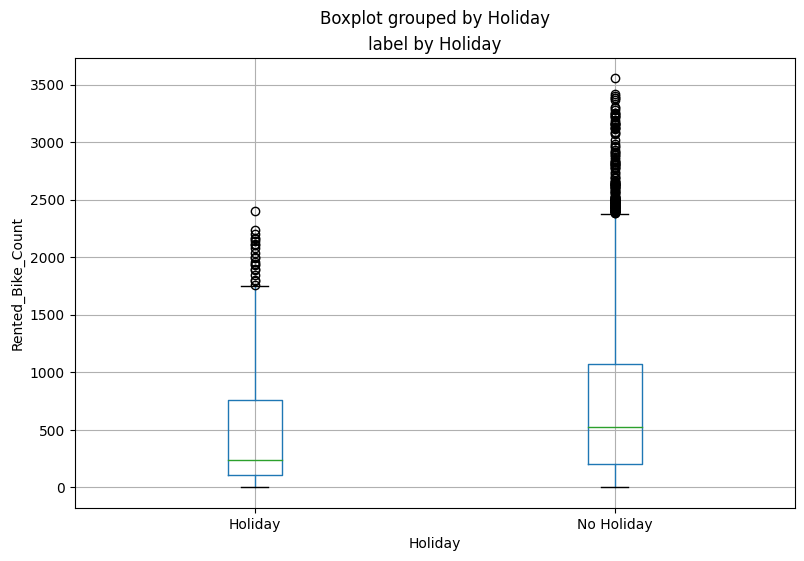

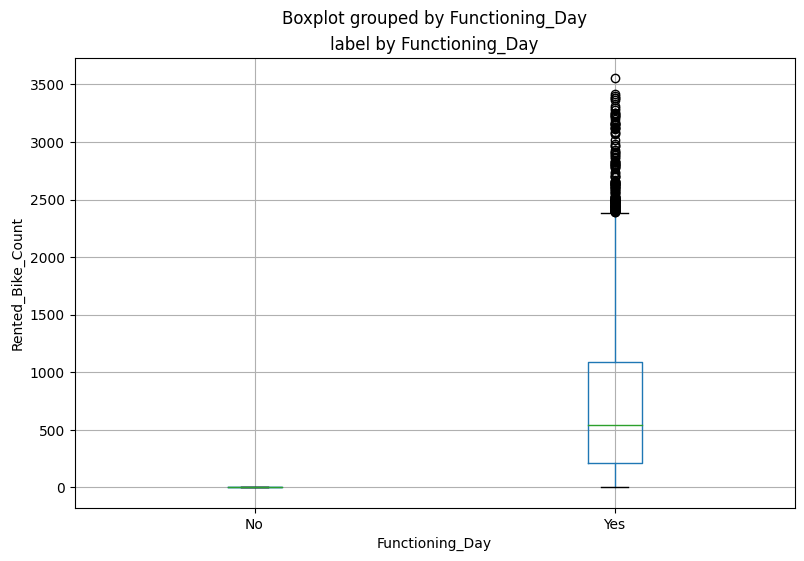

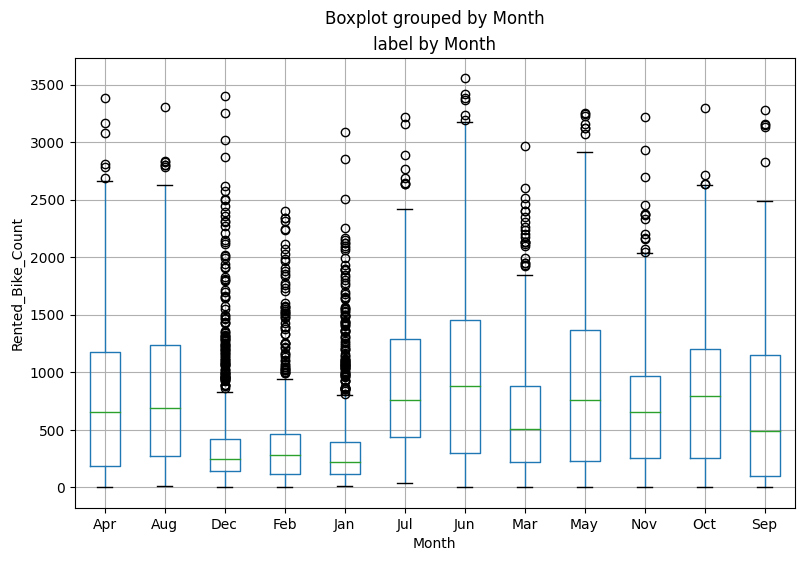

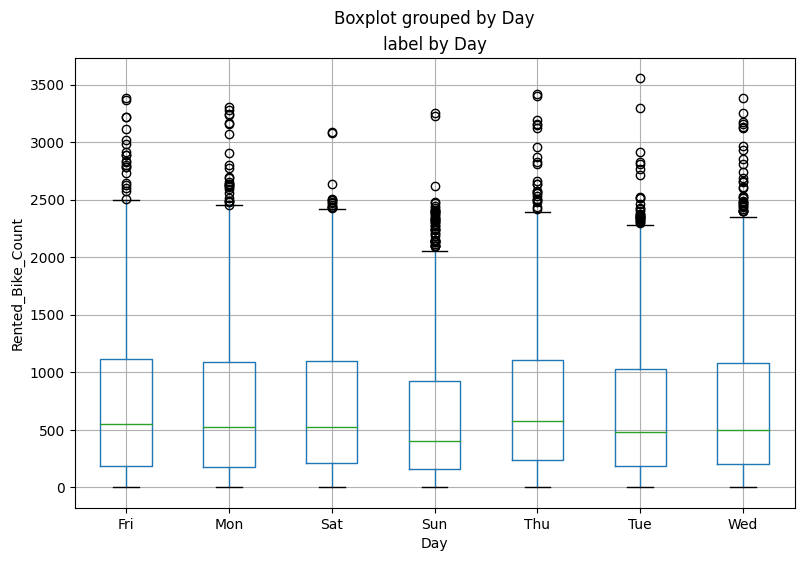

In [38]:
for col in Categorical_feature:

  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  df.boxplot(column = 'Rented_Bike_Count',by =col,ax = ax)
  ax.set_title('label by '+col)
  ax.set_ylabel('Rented_Bike_Count')
plt.show()

##### 1. Why did you pick the specific chart?

We want to see the range of distribution of average bike demand according to different features.Box or whisker plot help us to analyze the data in total 5 number of summary

.Lower whisker(Q1 - 1.5*IQR)

.Q1 - Fast quartile or 25%

.Q2 - Median or 50%

.Q3 - Third quartile or 75%

.Upper whisker (Q3 + 1.5*IQR)

IQR = (Q3 - Q1)

and there is some value outside its range called Outlier.

##### 2. What is/are the insight(s) found from the chart?



*   In working day the  avg bike demand is high(500) as compare to non working day(200)
*   Summer,Autumn,spring in this three season bike demand is high as compare to winter season



#### Chart - 13 - Pair Plot

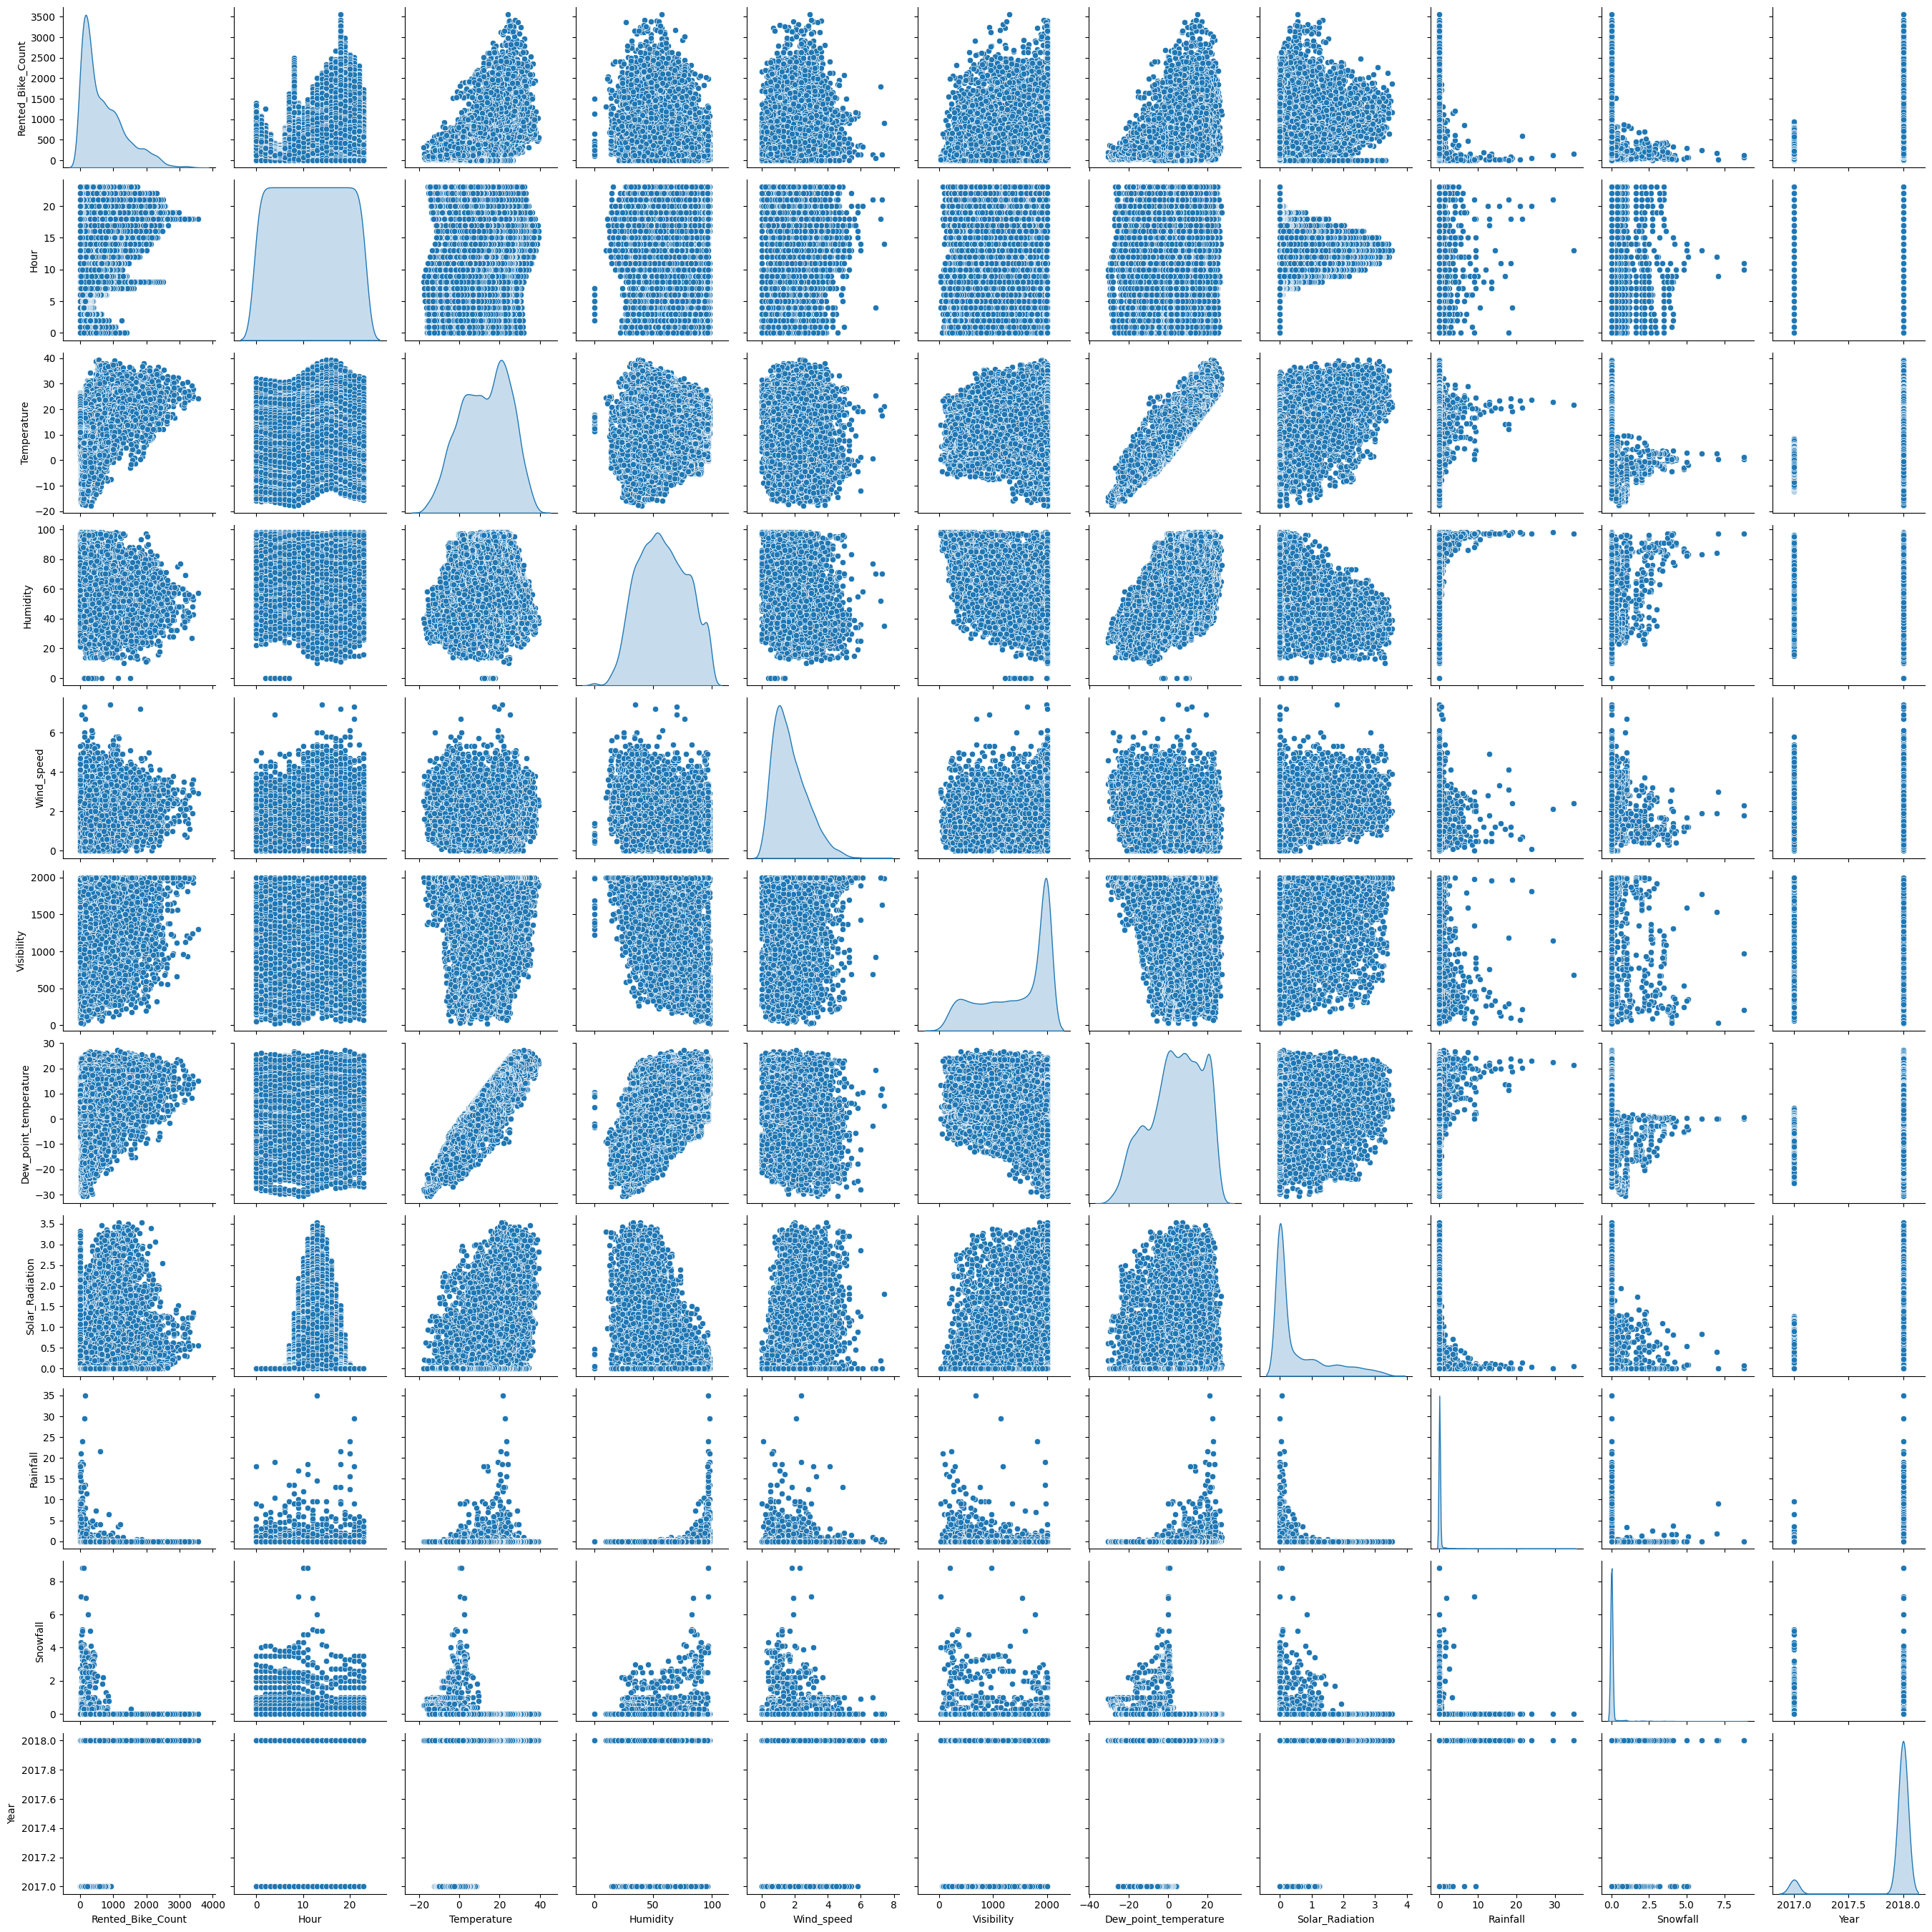

In [39]:
# Pair Plot visualization code
sns.pairplot(df,diag_kind = 'kde')

##### 1. Why did you pick the specific chart?



*  Using pairplot we will see the pair wise distribution of the data in different pair wise.  
* From the graph we can easily see the distribution of the variable .if there any right skew or left skew present or any cluster present in our data.

#### Chart - 14 - Correlation Heatmap

<Axes: >

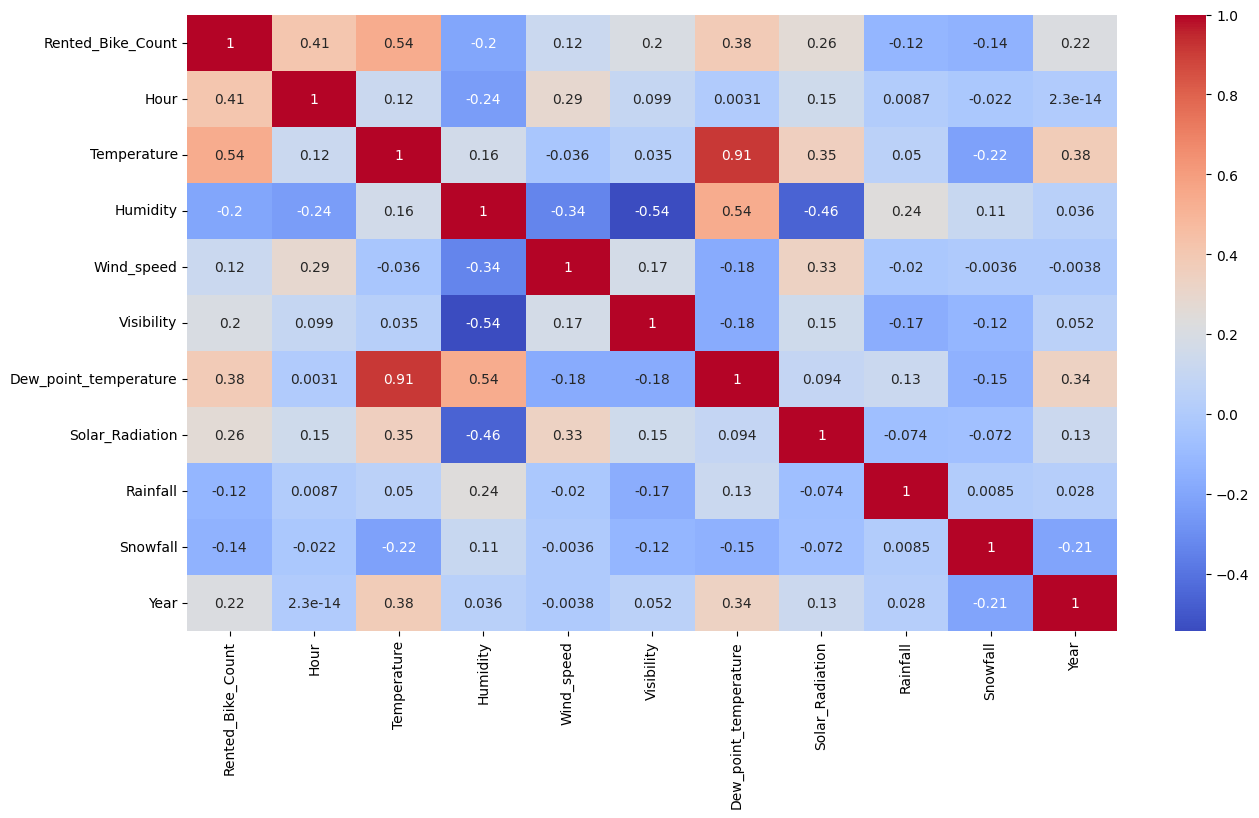

In [40]:
# Correlation Heatmap visualization code
plt.figure(figsize = (15,8))
correlation = df.corr()
sns.heatmap(correlation,annot = True,cmap ='coolwarm')

##### 1. Why did you pick the specific chart?



*   The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.
*   The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.



##### 2. What is/are the insight(s) found from the chart?

Since dew_point_temperature and temperature have a correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence we have to dropped dew_point_temperature.

In [41]:
# droping dew_point_temperature column due to multi-collinearity
df.drop('Dew_point_temperature', axis=1, inplace=True)

In [42]:
df.head(1)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   

   Visibility  Solar_Radiation  Rainfall  Snowfall Seasons     Holiday  \
0        2000              0.0       0.0       0.0  Winter  No Holiday   

  Functioning_Day Month  Day  Year  
0             Yes   Jan  Thu  2017

## ***5. VIF***

### VIF (Variance Inflation Factor) analysis is a statistical method used to identify multicollinearity in a set of predictor variables. Multicollinearity is a situation where two or more predictor variables in a regression model are highly correlated with each other, meaning that they provide redundant information about the response variable.

###VIF analysis is an important step in the development of a regression model, as it helps to ensure that the results are reliable and interpretable and that the predictor variables are not providing redundant information.

In [43]:
# Checking Multi colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

In [44]:
calc_vif(df[[i for i in df.describe().columns]])

VIF Factor           features
0    4.142355  Rented_Bike_Count
1    5.050436               Hour
2    4.917668        Temperature
3   24.215117           Humidity
4    4.805147         Wind_speed
5   10.249903         Visibility
6    2.783706    Solar_Radiation
7    1.109911           Rainfall
8    1.123008           Snowfall
9   54.487121               Year

The VIF factor of 'year' is too large hence we will remove the year from our data to build our model.

In [45]:
# droping year column due to multi-collinearity
df.drop('Year', axis=1, inplace=True)

In [46]:
df.head(1)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   

   Visibility  Solar_Radiation  Rainfall  Snowfall Seasons     Holiday  \
0        2000              0.0       0.0       0.0  Winter  No Holiday   

  Functioning_Day Month  Day  
0             Yes   Jan  Thu

In [47]:
calc_vif(df[[i for i in df.describe().columns]])

VIF Factor           features
0    4.079409  Rented_Bike_Count
1    4.666421               Hour
2    4.461586        Temperature
3    5.064468           Humidity
4    4.615473         Wind_speed
5    4.842512         Visibility
6    2.255230    Solar_Radiation
7    1.103319           Rainfall
8    1.120752           Snowfall

In [48]:
# droping Date column
df.drop('Date', axis=1, inplace=True)

In [49]:
df.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   

   Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   

  Month  Day  
0   Jan  Thu

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [50]:
Numerical_features = df.describe().columns
Numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

In [51]:
# Removing rainfall and snowfall as it may remove important information as these 2 columns are very less skewed.
Numerical_features = Numerical_features[2:-2]
Numerical_features

Index(['Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation'],
      dtype='object')

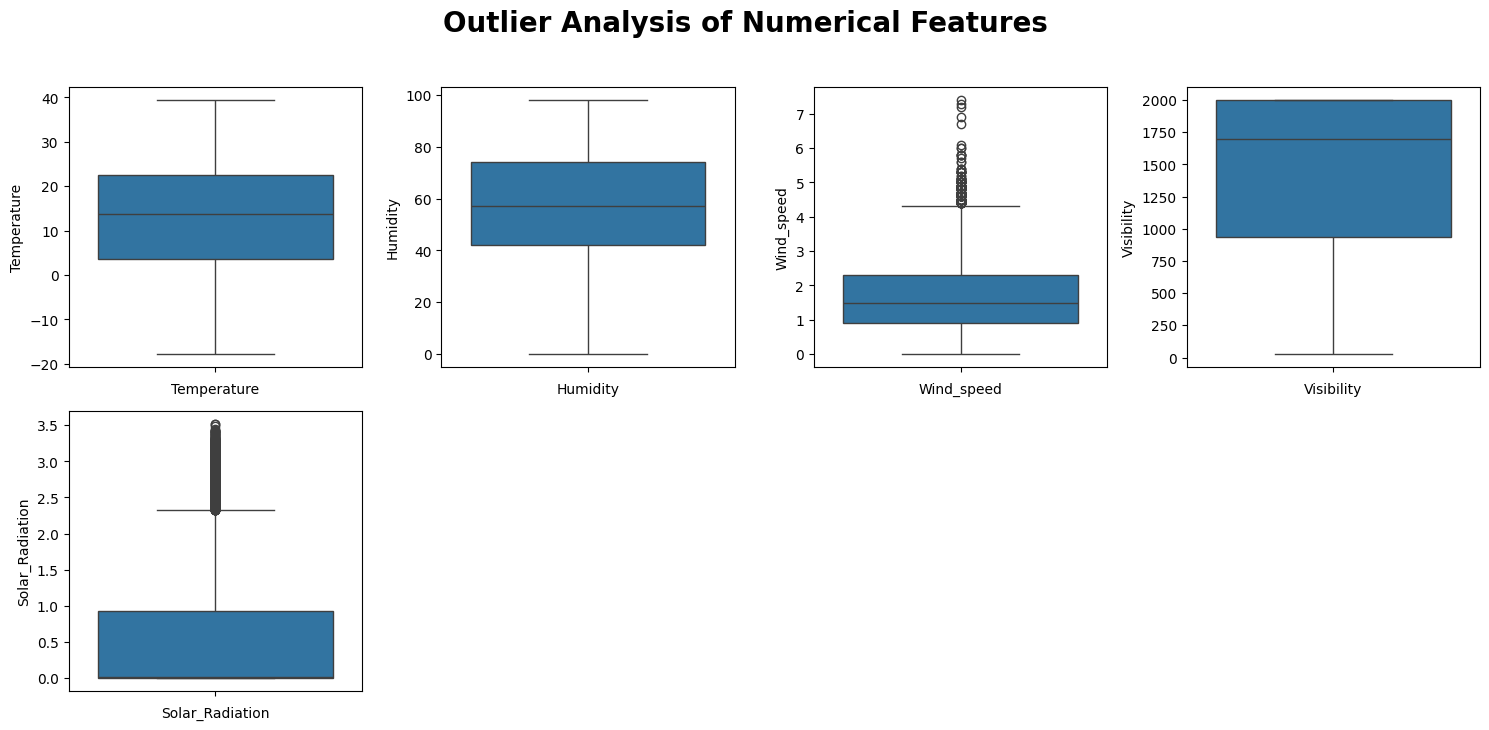

In [52]:
# figsize
plt.figure(figsize=(15, 10))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(Numerical_features):
    plt.subplot(3, 4, i % 6 + 1)  # Use i % 6 + 1 to ensure indices stay within 1 to 6

    # countplot
    sns.boxplot(df[col])
    # x-axis label
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Outliers are visible in the 'wind_speed', and 'solar_radiation' columns.

Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

Clipping Method: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [53]:
# we are going to replace the datapoints with upper and lower bound of all the outliers
def clip_outliers(bike_df):
    for col in bike_df[Numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)
    return bike_df

In [54]:
# using the function to treat outliers
bike_df = clip_outliers(df)

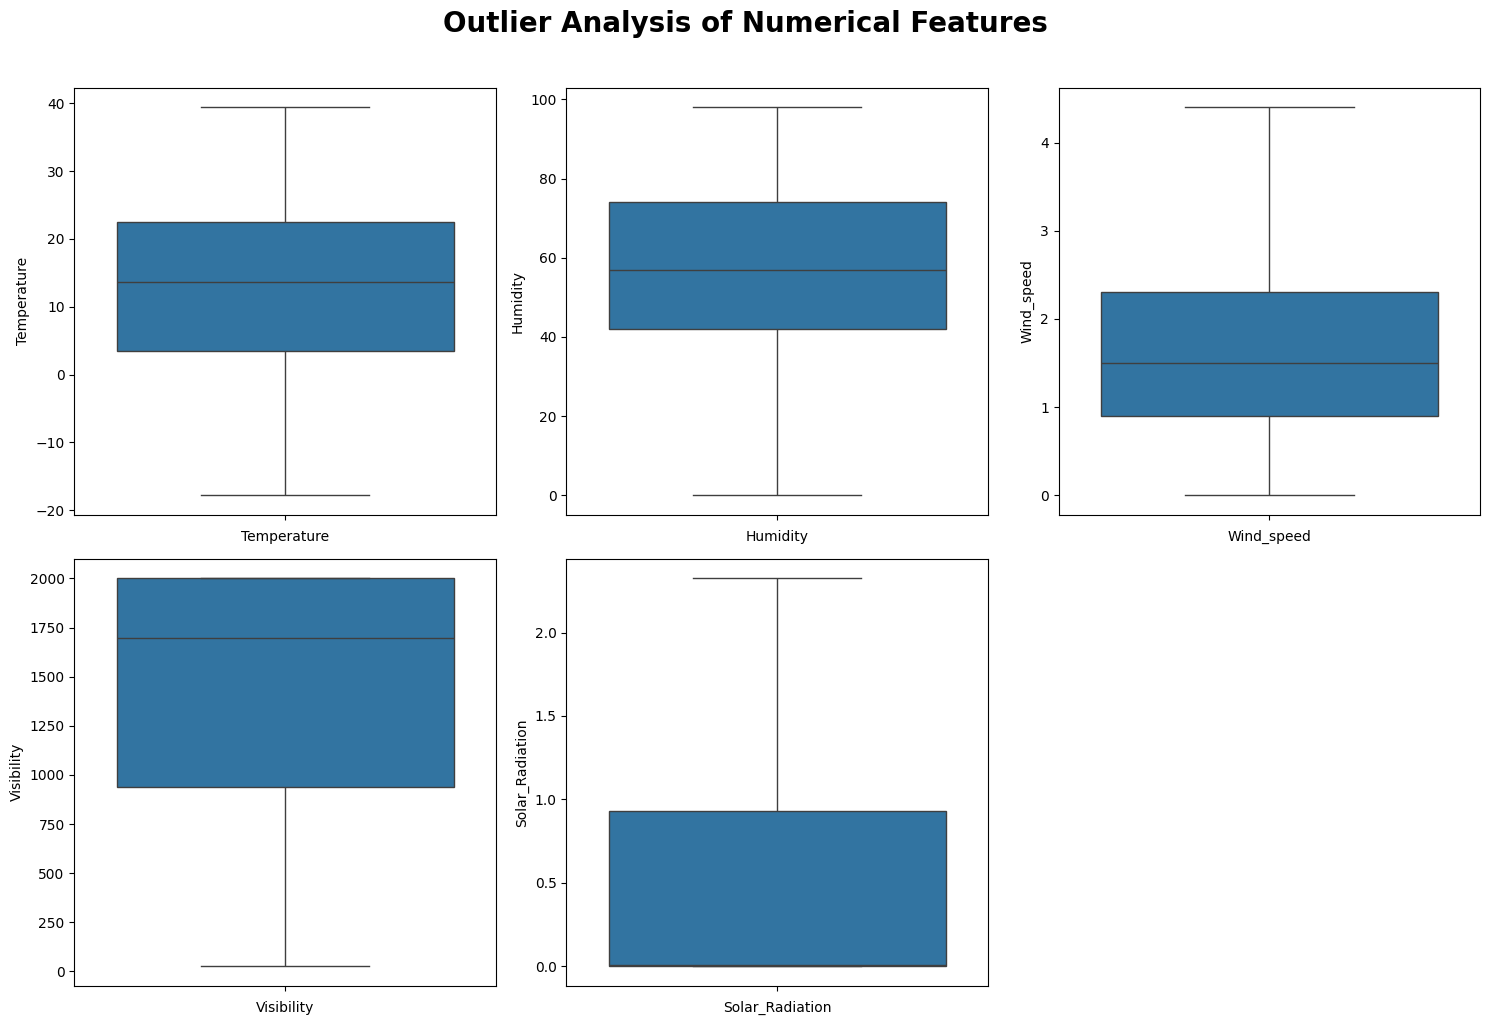

In [55]:
# figsize
plt.figure(figsize=(15, 10))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(Numerical_features):
    plt.subplot(2, 3, i % 6 + 1)  # Use i % 6 + 1 to ensure indices stay within 1 to 6

    # countplot
    sns.boxplot(df[col])
    # x-axis label
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### 3. Categorical Encoding

In [56]:
# For month and day column we give a respective value for this
encoder_nums = {'Month':{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12},
                'Day':{'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7},
                'Holiday':{'Holiday':0,'No Holiday':1},
                'Functioning_Day':{'Yes':1,'No':0}}

In [57]:
bike_df = bike_df.replace(encoder_nums)

In [58]:
bike_df = pd.get_dummies(bike_df,columns=['Seasons'],prefix=['S_type'])

In [59]:
bike_df.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   

   Solar_Radiation  Rainfall  Snowfall  Holiday  Functioning_Day  Month  Day  \
0              0.0       0.0       0.0        1                1      1    4   

   S_type_Autumn  S_type_Spring  S_type_Summer  S_type_Winter  
0              0              0              0              1

#### What all categorical encoding techniques have you used & why did you use those techniques?



*   Firstly i am using labelwise encoding
*   Then i am doing One hot encoding



### 5. Data Scaling

In [60]:
# Scaling your data
sc = StandardScaler()
scaled_data = pd.DataFrame(sc.fit_transform(bike_df.iloc[:,1:]),)
scaled_data.columns = bike_df.columns[1:]

In [61]:
scaled_data['Rented_Bike_Count'] = df['Rented_Bike_Count']

In [62]:
scaled_data.head()

Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0 -1.661325    -1.513957 -1.042483    0.480104    0.925871        -0.682824   
1 -1.516862    -1.539074 -0.993370   -0.908608    0.925871        -0.682824   
2 -1.372399    -1.580936 -0.944257   -0.710220    0.925871        -0.682824   
3 -1.227936    -1.597680 -0.895144   -0.809414    0.925871        -0.682824   
4 -1.083473    -1.580936 -1.091596    0.579298    0.925871        -0.682824   

   Rainfall  Snowfall   Holiday  Functioning_Day     Month      Day  \
0   -0.1318 -0.171891  0.227757          0.18668 -1.602745 -0.01096   
1   -0.1318 -0.171891  0.227757          0.18668 -1.602745 -0.01096   
2   -0.1318 -0.171891  0.227757          0.18668 -1.602745 -0.01096   
3   -0.1318 -0.171891  0.227757          0.18668 -1.602745 -0.01096   
4   -0.1318 -0.171891  0.227757          0.18668 -1.602745 -0.01096   

   S_type_Autumn  S_type_Spring  S_type_Summer  S_type_Winter  \
0      -0.576296      -0.580514      -0.580514       1.748015   
1      -0.576296      -0.580514      -0.580514       1.748015   
2      -0.576296      -0.580514      -0.580514       1.748015   
3      -0.576296      -0.580514      -0.580514       1.748015   
4      -0.576296      -0.580514      -0.580514       1.748015   

   Rented_Bike_Count  
0                254  
1                204  
2                173  
3                107  
4                 78

##### Which method have you used to scale you data and why?

I am using standard scaler.because some feature has extremely low values as compare to other features otherwise it will bias our model.This method also not affected by outlier

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [63]:
# Transform Your data
# Using power tranform method
pt = PowerTransformer()
pscaled_data = pd.DataFrame(pt.fit_transform(scaled_data))
pscaled_data.columns = scaled_data.columns

Yes my dataset need to be tranformed becauese using pairplot we see most of the column suffer from skewness.

*   Here i am using PowerTranform.This is applied fot adjusting the distribution of variable.making it more Gaussian like(closer to normal distribution)




In [64]:
pscaled_data.head()

Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0 -1.661325    -1.455250 -1.046458    0.637378    1.066428         -0.82956   
1 -1.516862    -1.476981 -0.995314   -0.964428    1.066428         -0.82956   
2 -1.372399    -1.513121 -0.944242   -0.681902    1.066428         -0.82956   
3 -1.227936    -1.527551 -0.893243   -0.821151    1.066428         -0.82956   
4 -1.083473    -1.513121 -1.097673    0.720598    1.066428         -0.82956   

   Rainfall  Snowfall   Holiday  Functioning_Day     Month       Day  \
0 -0.252636 -0.230789  0.227757          0.18668 -1.597566 -0.009917   
1 -0.252636 -0.230789  0.227757          0.18668 -1.597566 -0.009917   
2 -0.252636 -0.230789  0.227757          0.18668 -1.597566 -0.009917   
3 -0.252636 -0.230789  0.227757          0.18668 -1.597566 -0.009917   
4 -0.252636 -0.230789  0.227757          0.18668 -1.597566 -0.009917   

   S_type_Autumn  S_type_Spring  S_type_Summer  S_type_Winter  \
0      -0.576296      -0.580514      -0.580514       1.748015   
1      -0.576296      -0.580514      -0.580514       1.748015   
2      -0.576296      -0.580514      -0.580514       1.748015   
3      -0.576296      -0.580514      -0.580514       1.748015   
4      -0.576296      -0.580514      -0.580514       1.748015   

   Rented_Bike_Count  
0          -0.530004  
1          -0.676497  
2          -0.779424  
3          -1.047379  
4          -1.200315

### 8. Data Splitting

In [65]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = pscaled_data.drop('Rented_Bike_Count',axis =1)
Y = pscaled_data[['Rented_Bike_Count']]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

##### What data splitting ratio have you used and why?

I am choosing 80% for training and 20% for testing becuse it is standard procedure to split

## ***7. ML Model Implementation***

### ML Model - 1

In [67]:
# empty list for appending performance metric score
model_result = []

def predict(ml_model,model_name):

  '''
  This function Pass the model and predict value forthis model.
  This Function also calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  '''
  # model fitting
  model = ml_model.fit(x_train,y_train)

  # predicting values
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  #Evaluation metrics on train data
  train_MSE  = mean_squared_error(y_train, y_train_pred)
  train_RMSE = np.sqrt(train_MSE)
  train_r2 = r2_score(y_train, y_train_pred)
  train_adj_r2 = 1-(1-r2_score(y_train, y_train_pred))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*100)
  #Evaluation metrics on test data

  test_MSE  = mean_squared_error(y_test, y_test_pred)
  test_RMSE = np.sqrt(test_MSE)
  test_r2 = r2_score(y_test, y_test_pred)
  test_adj_r2 = 1-(1-r2_score(y_test, y_test_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*100)
  # graph --> actual vs predicted on test data
  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:23])
  plt.plot(np.array((y_test)[:23]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on fast 23 points')
  plt.show()

  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})



train MSE : 0.285213372879622
train RMSE : 0.5340537172229232
train R2 : 0.7129712191030466
train Adj R2 : 0.7123143087190742
----------------------------------------------------------------------------------------------------
test MSE : 0.2956612018400159
test RMSE : 0.5437473695016978
test R2 : 0.711173164048954
test Adj R2 : 0.7085096312678494
----------------------------------------------------------------------------------------------------


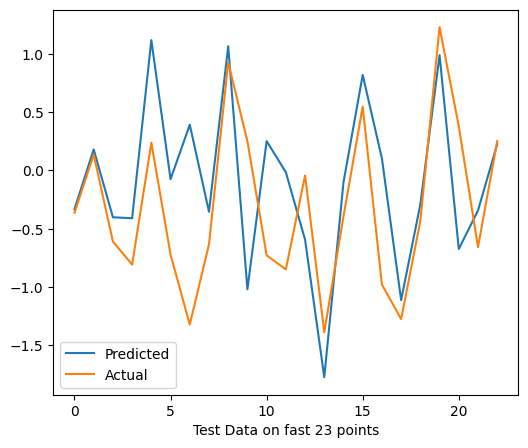

In [68]:
# firstly we use simple linear regression
predict(LinearRegression(), 'LinearRegression')

hence the result is so poor so Now we do polynomial fit to my data and check the result again.

In [69]:
# using pipeline
pipe = Pipeline((
    ('poly',PolynomialFeatures(degree = 2)),
    ('lr',LinearRegression())
    ))

train MSE : 0.18714242599435063
train RMSE : 0.4325996139553879
train R2 : 0.8116663961267763
train Adj R2 : 0.8112353651352198
----------------------------------------------------------------------------------------------------
test MSE : 0.19860038469089
test RMSE : 0.44564603071371567
test R2 : 0.8059903688006762
test Adj R2 : 0.8042012309913453
----------------------------------------------------------------------------------------------------


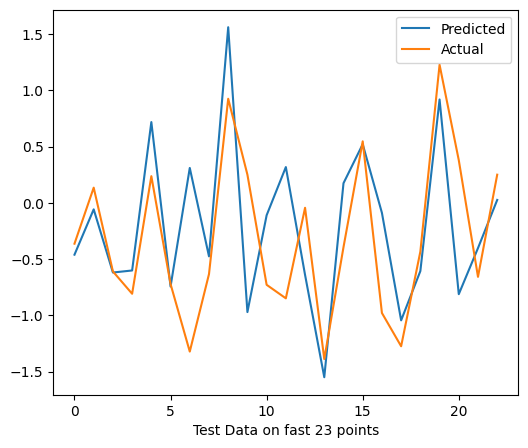

In [109]:
predict(pipe,'Polynomial Regression')

### ML Model - 2

2.1 Ridge Regression and lasso regression

In [70]:
# Using L2 regularization and doing hyperparameter tuning for finding best hyperparmetr fir this model
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

train MSE : 0.2852151096157111
train RMSE : 0.5340553432142694
train R2 : 0.7129694713124806
train Adj R2 : 0.7123125569284152
----------------------------------------------------------------------------------------------------
test MSE : 0.29566045820088066
test RMSE : 0.5437466856918584
test R2 : 0.7111738904984752
test Adj R2 : 0.7085103644166169
----------------------------------------------------------------------------------------------------


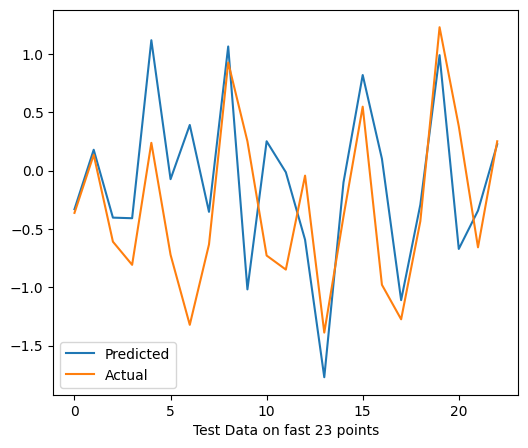

In [71]:
predict(ridge_regressor,'L2-Regularized')

In [72]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.2864210838977938


# Lasso regression

In [73]:
# Using L1 regularization and doing hyperparameter tuning for finding best hyperparmetr for this model
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)


train MSE : 0.2852276161244092
train RMSE : 0.534067052086542
train R2 : 0.7129568851987629
train Adj R2 : 0.7122999420094023
----------------------------------------------------------------------------------------------------
test MSE : 0.2956834480863518
test RMSE : 0.5437678255343468
test R2 : 0.7111514320364309
test Adj R2 : 0.7084876988448361
----------------------------------------------------------------------------------------------------


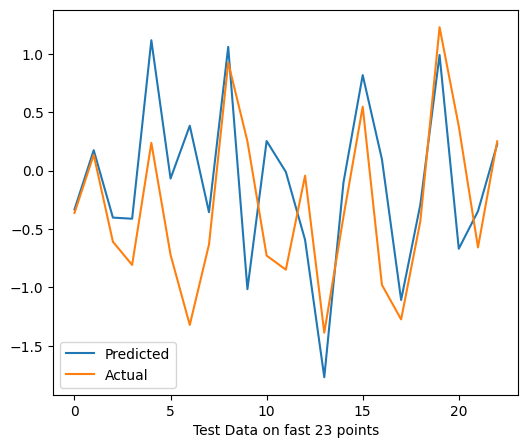

In [74]:
predict(lasso_regressor,'L1-regularized')

In [75]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.2863876907011311


# Elastic net regression

In [76]:
## Using  ElasticNet regularization and doing hyperparameter tuning for finding best hyperparmetr for this model

elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

train MSE : 0.285223021615145
train RMSE : 0.534062750634366
train R2 : 0.7129615089524797
train Adj R2 : 0.7123045763453046
----------------------------------------------------------------------------------------------------
test MSE : 0.29567725174112136
test RMSE : 0.5437621279025613
test R2 : 0.7111574851498467
test Adj R2 : 0.7084938077794707
----------------------------------------------------------------------------------------------------


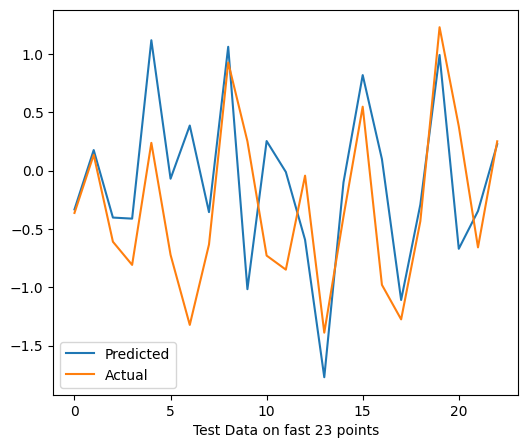

In [77]:
predict(elastic_regressor,'Elastic_net_regularized')

In [78]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.28674179572912945


### ML Model - 3

# Random Forest

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to make a final classification or regression prediction. In contrast to a single decision tree, Random Forest reduces the risk of overfitting by combining the results of many trees, each built on a different subset of the data.

In [79]:
param_grid = {'n_estimators': [50,80],       # number of trees in the ensemble
             'max_depth': [15,25],           # maximum number of levels allowed in each tree.
             'min_samples_split': [5,15],    # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.

Rf = RandomForestRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(Rf, param_grid=param_grid, cv=5, scoring='r2')

train MSE : 0.02634429192325881
train RMSE : 0.16230924780572056
train R2 : 0.9734880243588091
train Adj R2 : 0.9734273475442963
----------------------------------------------------------------------------------------------------
test MSE : 0.08505885550968752
test RMSE : 0.29164851364217087
test R2 : 0.9169073251627593
test Adj R2 : 0.9161410526570557
----------------------------------------------------------------------------------------------------


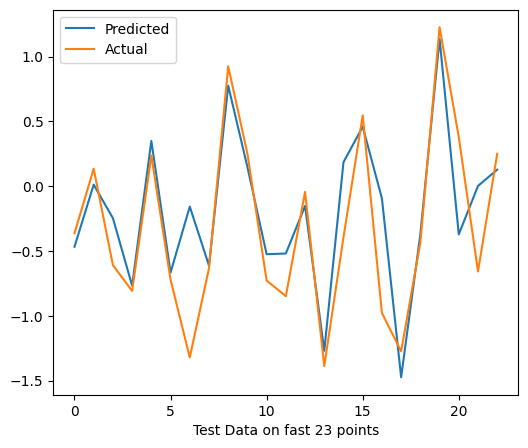

In [80]:
predict(grid_search, 'Random Forest')

In [81]:
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=25, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80)

In [82]:
# feature importance
importances = grid_search.best_estimator_.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features


Feature  Feature Importance
1       Temperature            0.302584
0              Hour            0.215679
9   Functioning_Day            0.183351
2          Humidity            0.140641
6          Rainfall            0.043398
15    S_type_Winter            0.028273
5   Solar_Radiation            0.021828
11              Day            0.014217
12    S_type_Autumn            0.012689
4        Visibility            0.011026
10            Month            0.010072
3        Wind_speed            0.008184
13    S_type_Spring            0.003257
8           Holiday            0.002451
7          Snowfall            0.001497
14    S_type_Summer            0.000853

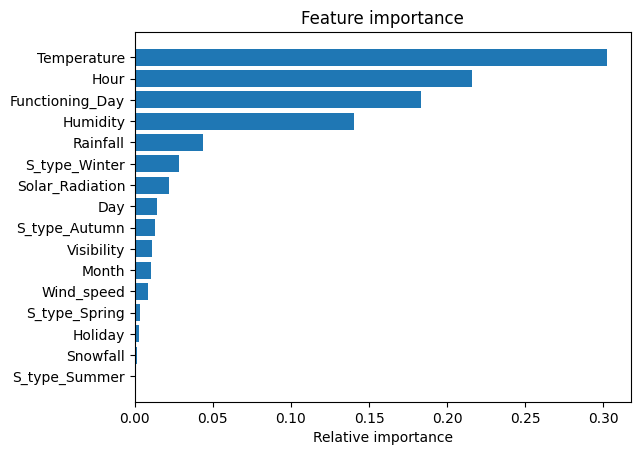

In [83]:
# plot the Variable importance
features = x_train.columns
importance = grid_search.best_estimator_.feature_importances_  # Access feature importances directly
indices = np.argsort(importance)

plt.title('Feature importance')
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()




*   The top 5 important features in Random Forest are temperature, hour, functioning_day, humidity and rainfall respectively



# AdaBoost (Adaptive Boosting)

AdaBoost (Adaptive Boosting) is an ensemble machine learning algorithm that combines multiple weak models to form a stronger model. It works by assigning weights to the data points in a dataset and iteratively building weak models that try to correctly classify or predict the target variable. After each iteration, the weights of the misclassified or mispredicted data points are increased, making it more likely that the next weak model will focus on these points.

In [84]:
# Create a base decision tree regression model
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor()
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator)

In [85]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'base_estimator__max_depth': [3, 5, 7,10,12]
    }
## Create the GridSearchCV object
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='r2', n_jobs=-1)


In [86]:
#finding best parameter then execute the predict function other wise it takes too time to execute
grid_search.fit(X, Y)
Ada_optimal_model = grid_search.best_estimator_
Ada_optimal_model

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),
                  learning_rate=0.01, n_estimators=150)

train MSE : 0.023890857795289634
train RMSE : 0.15456667750614825
train R2 : 0.9759570748091861
train Adj R2 : 0.9759020488038861
----------------------------------------------------------------------------------------------------
test MSE : 0.08901284260597447
test RMSE : 0.2983502012836165
test R2 : 0.9130447365806098
test Adj R2 : 0.9122428436614685
----------------------------------------------------------------------------------------------------


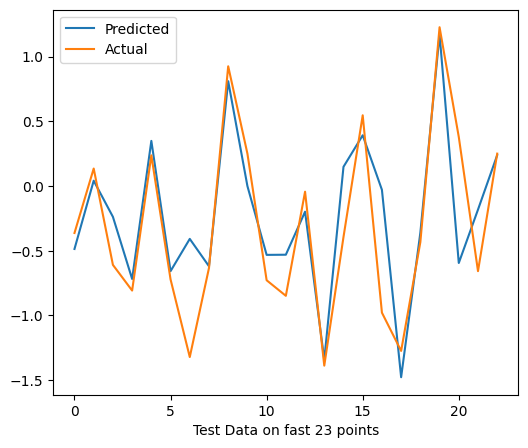

In [87]:
# Predict using function
predict(Ada_optimal_model, 'AdaBoost')

In [88]:
# feature importance
importances = grid_search.best_estimator_.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1       Temperature            0.277203
0              Hour            0.219153
9   Functioning_Day            0.181176
2          Humidity            0.142933
6          Rainfall            0.050318
15    S_type_Winter            0.040548
5   Solar_Radiation            0.022771
11              Day            0.013992
12    S_type_Autumn            0.013004
4        Visibility            0.011371
10            Month            0.009630
3        Wind_speed            0.008316
13    S_type_Spring            0.004124
8           Holiday            0.003106
7          Snowfall            0.001306
14    S_type_Summer            0.001050

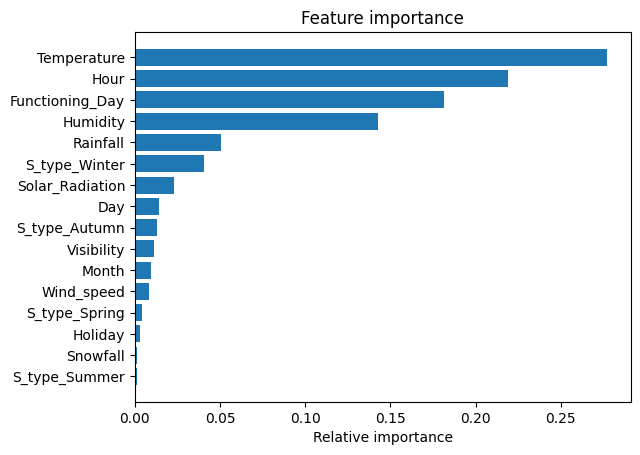

In [89]:
# plot the Variable importance
features = x_train.columns
importance = grid_search.best_estimator_.feature_importances_  # Access feature importances directly
indices = np.argsort(importance)

plt.title('Feature importance')
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

# Xtreme Gradient Boosting

XGBoost (eXtreme Gradient Boosting) is an optimized implementation of the Gradient Boosting algorithm that is specifically designed for large-scale and complex data. XGBoost is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make a final prediction.

In [90]:
param_grid = {'n_estimators': [300,500],     # number of trees in the ensemble
             'max_depth': [7,8],             # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.

# Initialize the RandomForestRegressor model
xgb = XGBRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, Y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [300, 500]},
             scoring='r2')

In [91]:
# Get the best parameters from the grid search
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, min_samples_leaf=3, min_samples_split=3,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=300, n_jobs=None, ...)

train MSE : 0.00032324680015434617
train RMSE : 0.017979065608488838
train R2 : 0.9996746957057434
train Adj R2 : 0.9996739511958438
----------------------------------------------------------------------------------------------------
test MSE : 0.06633776172131206
test RMSE : 0.25756118054029814
test R2 : 0.9351956709138705
test Adj R2 : 0.9345980517407418
----------------------------------------------------------------------------------------------------


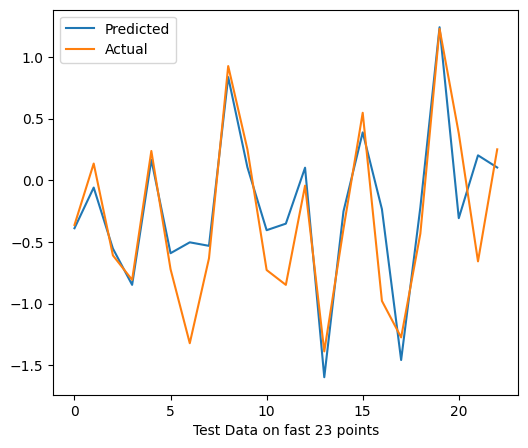

In [92]:
predict(xgb_optimal_model, 'XGB')

In [93]:
# feature importance
importances = grid_search.best_estimator_.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
9   Functioning_Day            0.644334
15    S_type_Winter            0.222799
6          Rainfall            0.047020
1       Temperature            0.015539
12    S_type_Autumn            0.014600
0              Hour            0.013945
2          Humidity            0.010905
8           Holiday            0.010175
7          Snowfall            0.005774
14    S_type_Summer            0.003528
13    S_type_Spring            0.002843
11              Day            0.002756
5   Solar_Radiation            0.002332
10            Month            0.001849
4        Visibility            0.000906
3        Wind_speed            0.000695

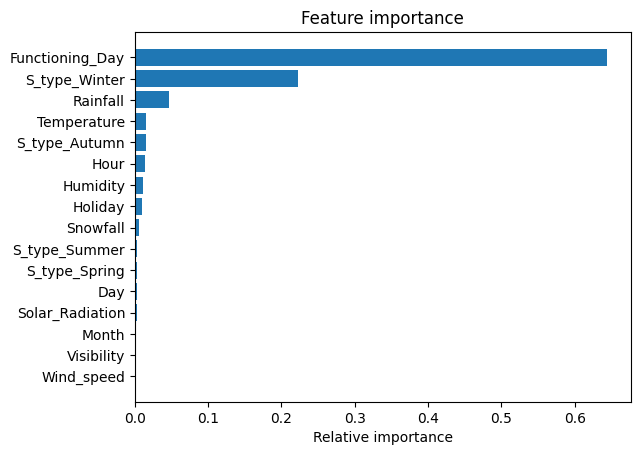

In [94]:
# plot the Variable importance
features = x_train.columns
importance = grid_search.best_estimator_.feature_importances_  # Access feature importances directly
indices = np.argsort(importance)

plt.title('Feature importance')
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

# Model Result

The fit of the model to the dependent variables can be evaluated using the R square measure. On the other hand, overfitting is not taken into consideration. If there are a lot of independent variables in the regression model, it may work well with training data but fail with testing data because it is too complicated. Adjusted R Square is a new metric that penalizes additional independent variables added to the model and adjusts the metric to prevent overfitting.

Because it estimates the relationship between the movements of a dependent variable and those of an independent variable, R square is the best evaluation method for predicting the rented_bike_count.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [95]:
# converting the model_result list into DataFrame
model_result = pd.DataFrame(model_result)

# sorting the values by test R2 score
model_result.sort_values(by='test R2', ascending=False)

model  train MSE  test MSE  train RMSE  test RMSE  \
6                      XGB   0.000323  0.066338    0.017979   0.257561   
4            Random Forest   0.026344  0.085059    0.162309   0.291649   
5                 AdaBoost   0.023891  0.089013    0.154567   0.298350   
1           L2-Regularized   0.285215  0.295660    0.534055   0.543747   
0         LinearRegression   0.285213  0.295661    0.534054   0.543747   
3  Elastic_net_regularized   0.285223  0.295677    0.534063   0.543762   
2           L1-regularized   0.285228  0.295683    0.534067   0.543768   

   train R2   test R2  train Adj R2  test Adj R2  
6  0.999675  0.935196      0.999674     0.934598  
4  0.973488  0.916907      0.973427     0.916141  
5  0.975957  0.913045      0.975902     0.912243  
1  0.712969  0.711174      0.712313     0.708510  
0  0.712971  0.711173      0.712314     0.708510  
3  0.712962  0.711157      0.712305     0.708494  
2  0.712957  0.711151      0.712300     0.708488

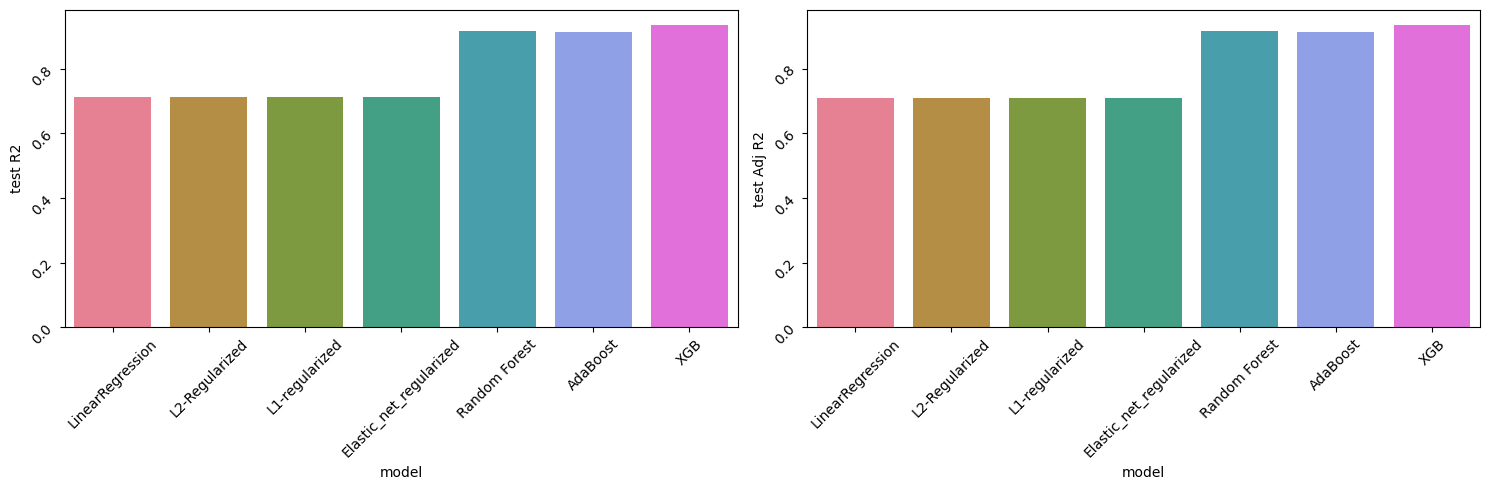

In [102]:
# Visualizing evaluation Metric Score chart

fig, ax = plt.subplots(1,2, figsize=(15,5))
# Create a colorful palette
colors = sns.color_palette("husl", len(model_result['model']))

sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0],palette=colors)           # Model Vs test R2
ax[0].tick_params(rotation=45)
sns.barplot(x=model_result['model'], y=model_result['test Adj R2'], ax=ax[1],palette=colors)       # Model Vs test Adj R2
ax[1].tick_params(rotation=45)
plt.tight_layout()


# From the above result, we can select XGB  as the final model because it has the lowest RMSE value as well as the highest R2 score on the test data.

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***